<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

In [ ]:
!pip install scikeras --upgrade
# Upgrade scikit-learn to a version that includes '_fit_context'
!pip install scikit-learn==1.4.2 --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 81.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1


In [ ]:
# Library for data manipulation and analysis.
import pandas as pd
# Fundamental package for scientific computing.
import numpy as np
#splitting datasets into training and testing sets.
from sklearn.model_selection import train_test_split
#Imports tools for data preprocessing including label encoding, one-hot encoding, and standard scaling
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
#Imports a class for imputing missing values in datasets.
from sklearn.impute import SimpleImputer
#Imports the Matplotlib library for creating visualizations.
import matplotlib.pyplot as plt
# Imports the Seaborn library for statistical data visualization.
import seaborn as sns
# Time related functions.
import time
#Imports functions for evaluating the performance of machine learning models
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report
# Import librariesto create k folds of data and get cross validation score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score


#Imports the tensorflow,keras and layers.
import tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras import backend

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
Data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NN_Week_3/bank-1.csv')

## Data Overview

In [ ]:
Data.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [ ]:
Data.shape

(10000, 14)

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


* There are 10,000  observations and 14 columns in the data.
* 3 columns are of the object datatype and 11 columns are numerical.

In [ ]:
# Let's check for duplicate values in the data
Data.duplicated().sum()

0

In [ ]:
Data["Exited"].value_counts(1)

Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64

* There is significant number of cases represented for the lower Class = 1 - Existed

In [ ]:
# Let's view the statistical summary of the numerical columns in the data
Data.describe().T

count          mean           std          min  \
RowNumber        10000.0  5.000500e+03   2886.895680         1.00   
CustomerId       10000.0  1.569094e+07  71936.186123  15565701.00   
CreditScore      10000.0  6.505288e+02     96.653299       350.00   
Age              10000.0  3.892180e+01     10.487806        18.00   
Tenure           10000.0  5.012800e+00      2.892174         0.00   
Balance          10000.0  7.648589e+04  62397.405202         0.00   
NumOfProducts    10000.0  1.530200e+00      0.581654         1.00   
HasCrCard        10000.0  7.055000e-01      0.455840         0.00   
IsActiveMember   10000.0  5.151000e-01      0.499797         0.00   
EstimatedSalary  10000.0  1.000902e+05  57510.492818        11.58   
Exited           10000.0  2.037000e-01      0.402769         0.00   

                         25%           50%           75%          max  
RowNumber            2500.75  5.000500e+03  7.500250e+03     10000.00  
CustomerId       15628528.25  1.569074e+07  1.575323e+07  15815690.00  
CreditScore           584.00  6.520000e+02  7.180000e+02       850.00  
Age                    32.00  3.700000e+01  4.400000e+01        92.00  
Tenure                  3.00  5.000000e+00  7.000000e+00        10.00  
Balance                 0.00  9.719854e+04  1.276442e+05    250898.09  
NumOfProducts           1.00  1.000000e+00  2.000000e+00         4.00  
HasCrCard               0.00  1.000000e+00  1.000000e+00         1.00  
IsActiveMember          0.00  1.000000e+00  1.000000e+00         1.00  
EstimatedSalary     51002.11  1.001939e+05  1.493882e+05    199992.48  
Exited                  0.00  0.000000e+00  0.000000e+00         1.00

In [ ]:
## Dropping RowNumber	CustomerId	Surname columns as it will not value (just Noise) to a Prediction Model
Data.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)


In [ ]:
Data.describe().T

count           mean           std     min       25%  \
CreditScore      10000.0     650.528800     96.653299  350.00    584.00   
Age              10000.0      38.921800     10.487806   18.00     32.00   
Tenure           10000.0       5.012800      2.892174    0.00      3.00   
Balance          10000.0   76485.889288  62397.405202    0.00      0.00   
NumOfProducts    10000.0       1.530200      0.581654    1.00      1.00   
HasCrCard        10000.0       0.705500      0.455840    0.00      0.00   
IsActiveMember   10000.0       0.515100      0.499797    0.00      0.00   
EstimatedSalary  10000.0  100090.239881  57510.492818   11.58  51002.11   
Exited           10000.0       0.203700      0.402769    0.00      0.00   

                        50%          75%        max  
CreditScore         652.000     718.0000     850.00  
Age                  37.000      44.0000      92.00  
Tenure                5.000       7.0000      10.00  
Balance           97198.540  127644.2400  250898.09  
NumOfProducts         1.000       2.0000       4.00  
HasCrCard             1.000       1.0000       1.00  
IsActiveMember        1.000       1.0000       1.00  
EstimatedSalary  100193.915  149388.2475  199992.48  
Exited                0.000       0.0000       1.00

## Exploratory Data Analysis

### Functions need to be defined to carry out the Exploratory Data Analysis.**

In [ ]:
# Function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# Function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

In [ ]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### Univariate Analysis

#### Exited - Target Variable

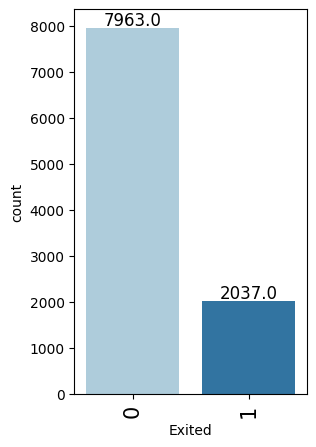

In [ ]:
labeled_barplot(Data, 'Exited')

#### Credit Score

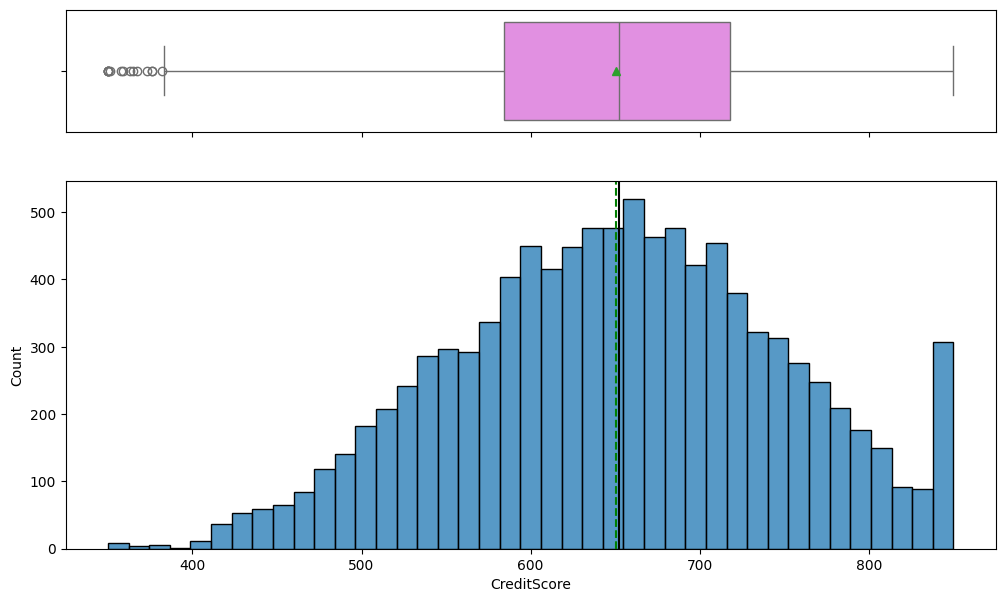

In [ ]:
histogram_boxplot(Data, 'CreditScore')

### Balances

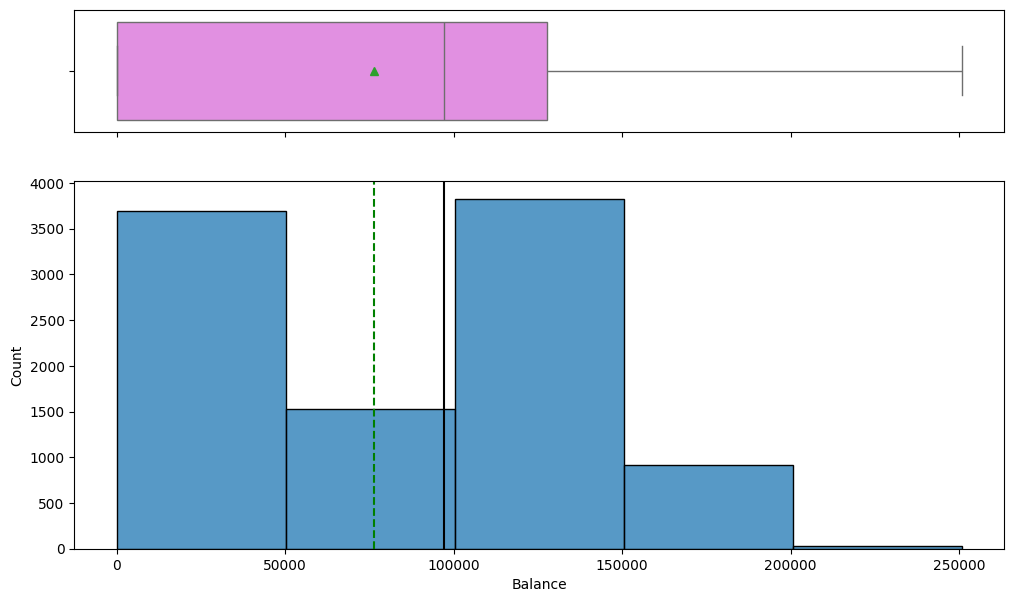

In [ ]:
# Plot counts of balances binning in 5 bins
histogram_boxplot(Data, 'Balance', bins=5)

In [ ]:
# count balances in 5 bins and calculate porportions
pd.cut(Data['Balance'], bins=5).value_counts(1)


Balance
(100359.236, 150538.854]    0.3828
(-250.898, 50179.618]       0.3692
(50179.618, 100359.236]     0.1533
(150538.854, 200718.472]    0.0915
(200718.472, 250898.09]     0.0032
Name: proportion, dtype: float64

* Customers with balances between 0-5k and between 10k-15k accounted  for over 76% in the dataset.

### Is Active Member

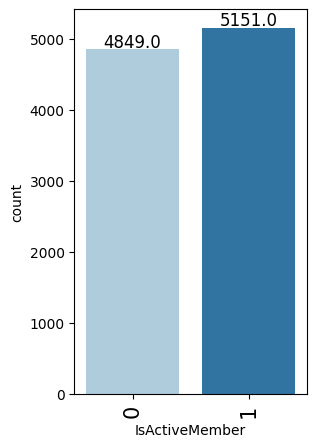

In [ ]:
labeled_barplot(Data, 'IsActiveMember')

* Almost equal representations of active and non-active customers

#### Estimated Salaries

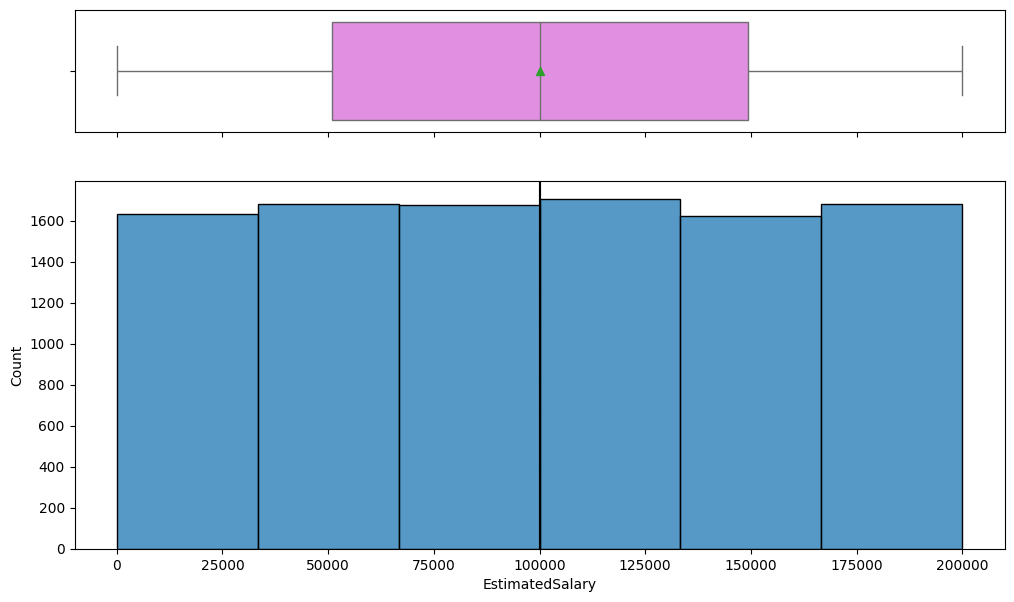

In [ ]:
# Plot counts of Estimated Salaries binning in 6 bins
histogram_boxplot(Data, 'EstimatedSalary', bins=6)

In [ ]:
# count Estimated Salaries in 5 bins and calculate porportions
pd.cut(Data['EstimatedSalary'], bins=6).value_counts(1)

EstimatedSalary
(100002.03, 133332.18]    0.1707
(166662.33, 199992.48]    0.1681
(33341.73, 66671.88]      0.1680
(66671.88, 100002.03]     0.1676
(-188.401, 33341.73]      0.1634
(133332.18, 166662.33]    0.1622
Name: proportion, dtype: float64

* Even count of estimated salaries represented in the dataset

#### Geography

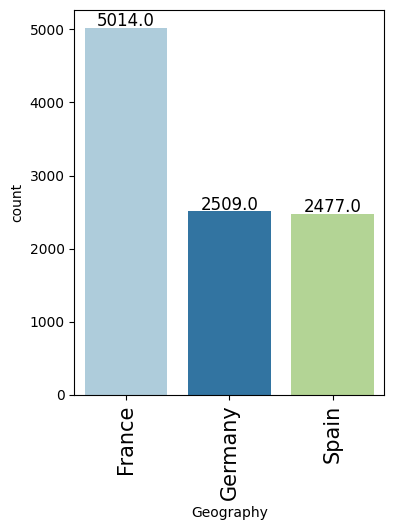

In [ ]:
labeled_barplot(Data, 'Geography')

* Good representation of France (close to 50%), Germany(close to 25%) and Spain(close to 25%) in the dataset.

#### Gender

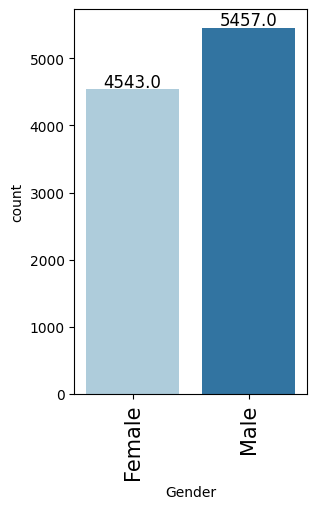

In [ ]:
labeled_barplot(Data, 'Gender')

 * Good representation of both Gender classes in the dataset

#### Age

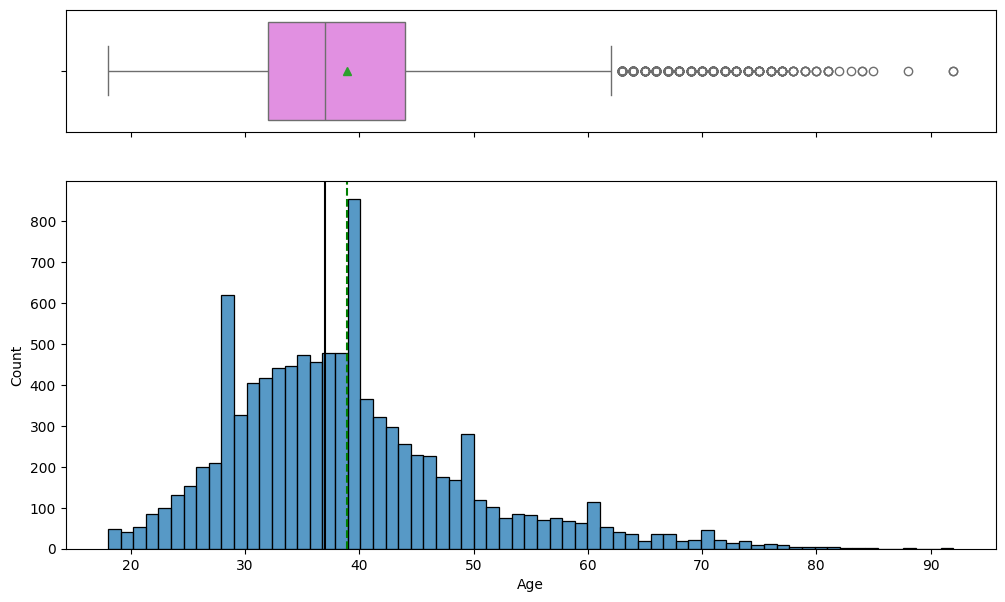

In [ ]:
histogram_boxplot(Data, 'Age')

#### Tenure

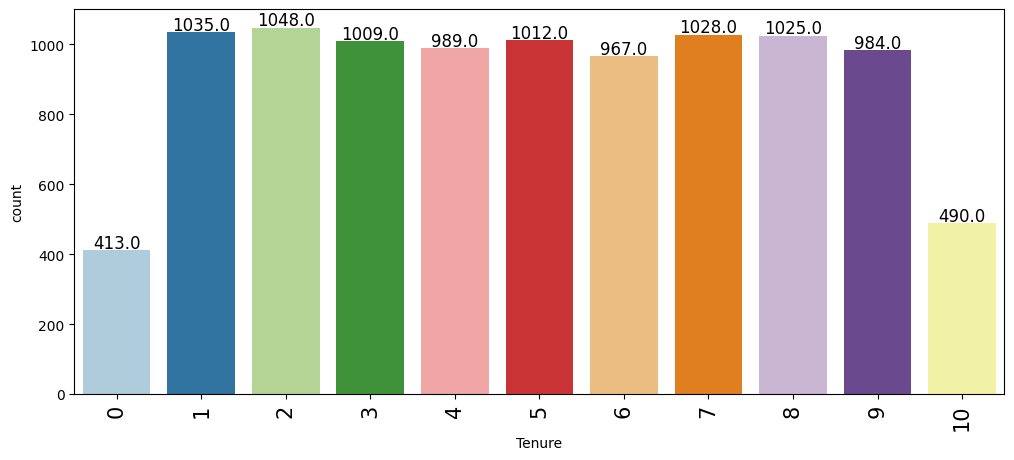

In [ ]:
labeled_barplot(Data, 'Tenure')

#### Balance

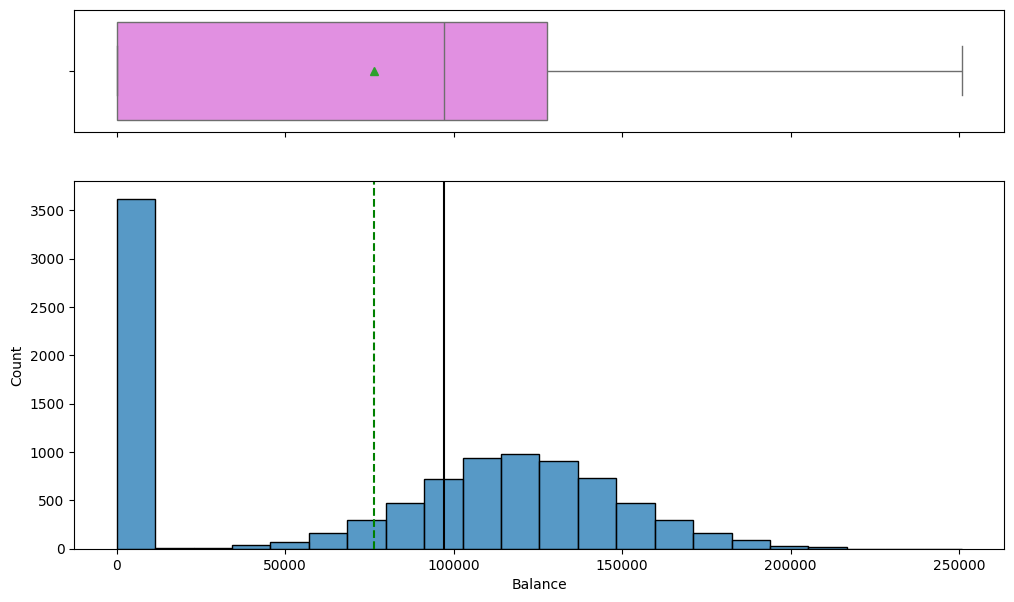

In [ ]:
histogram_boxplot(Data, 'Balance')

#### Number Of Products

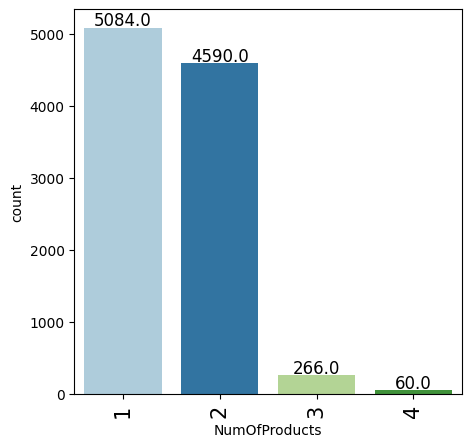

In [ ]:
labeled_barplot(Data, 'NumOfProducts')

* The Number of Products represented  in the dataset are imbalanced

#### Has Credit Card

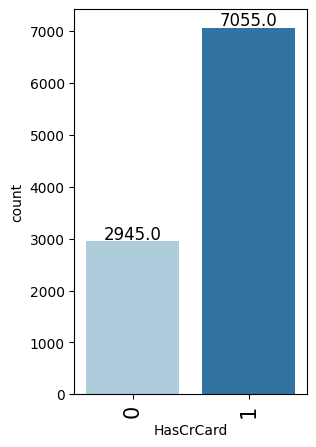

In [ ]:
labeled_barplot(Data, 'HasCrCard')

* There is significant number of cases represented for the lower Class = 0 - For customers that own credit card.

#### Estimated Salary

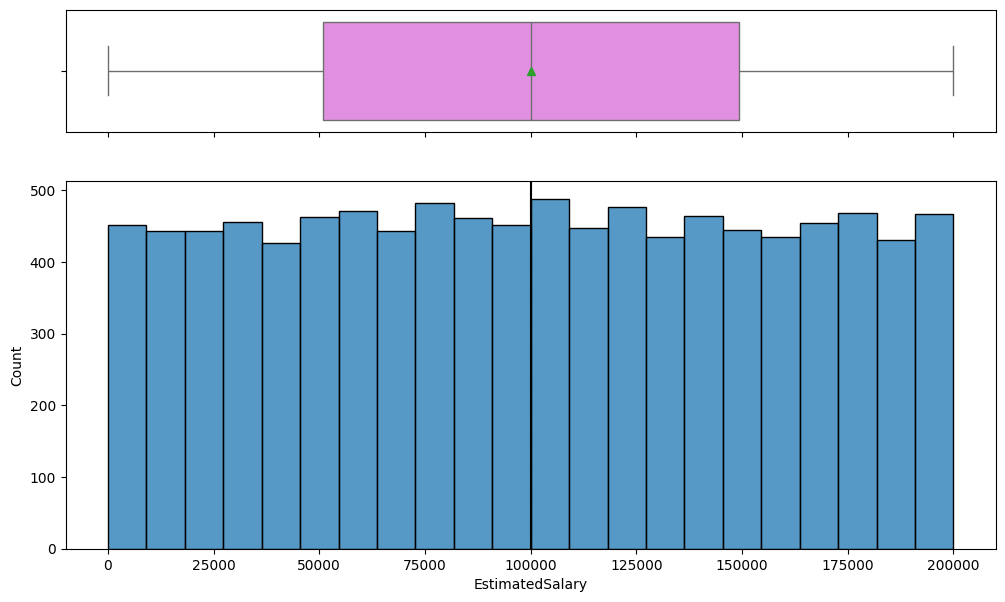

In [ ]:
histogram_boxplot(Data, 'EstimatedSalary')

* Approxiamte equal count representation across all estimated salaries

### Bivariate Analysis

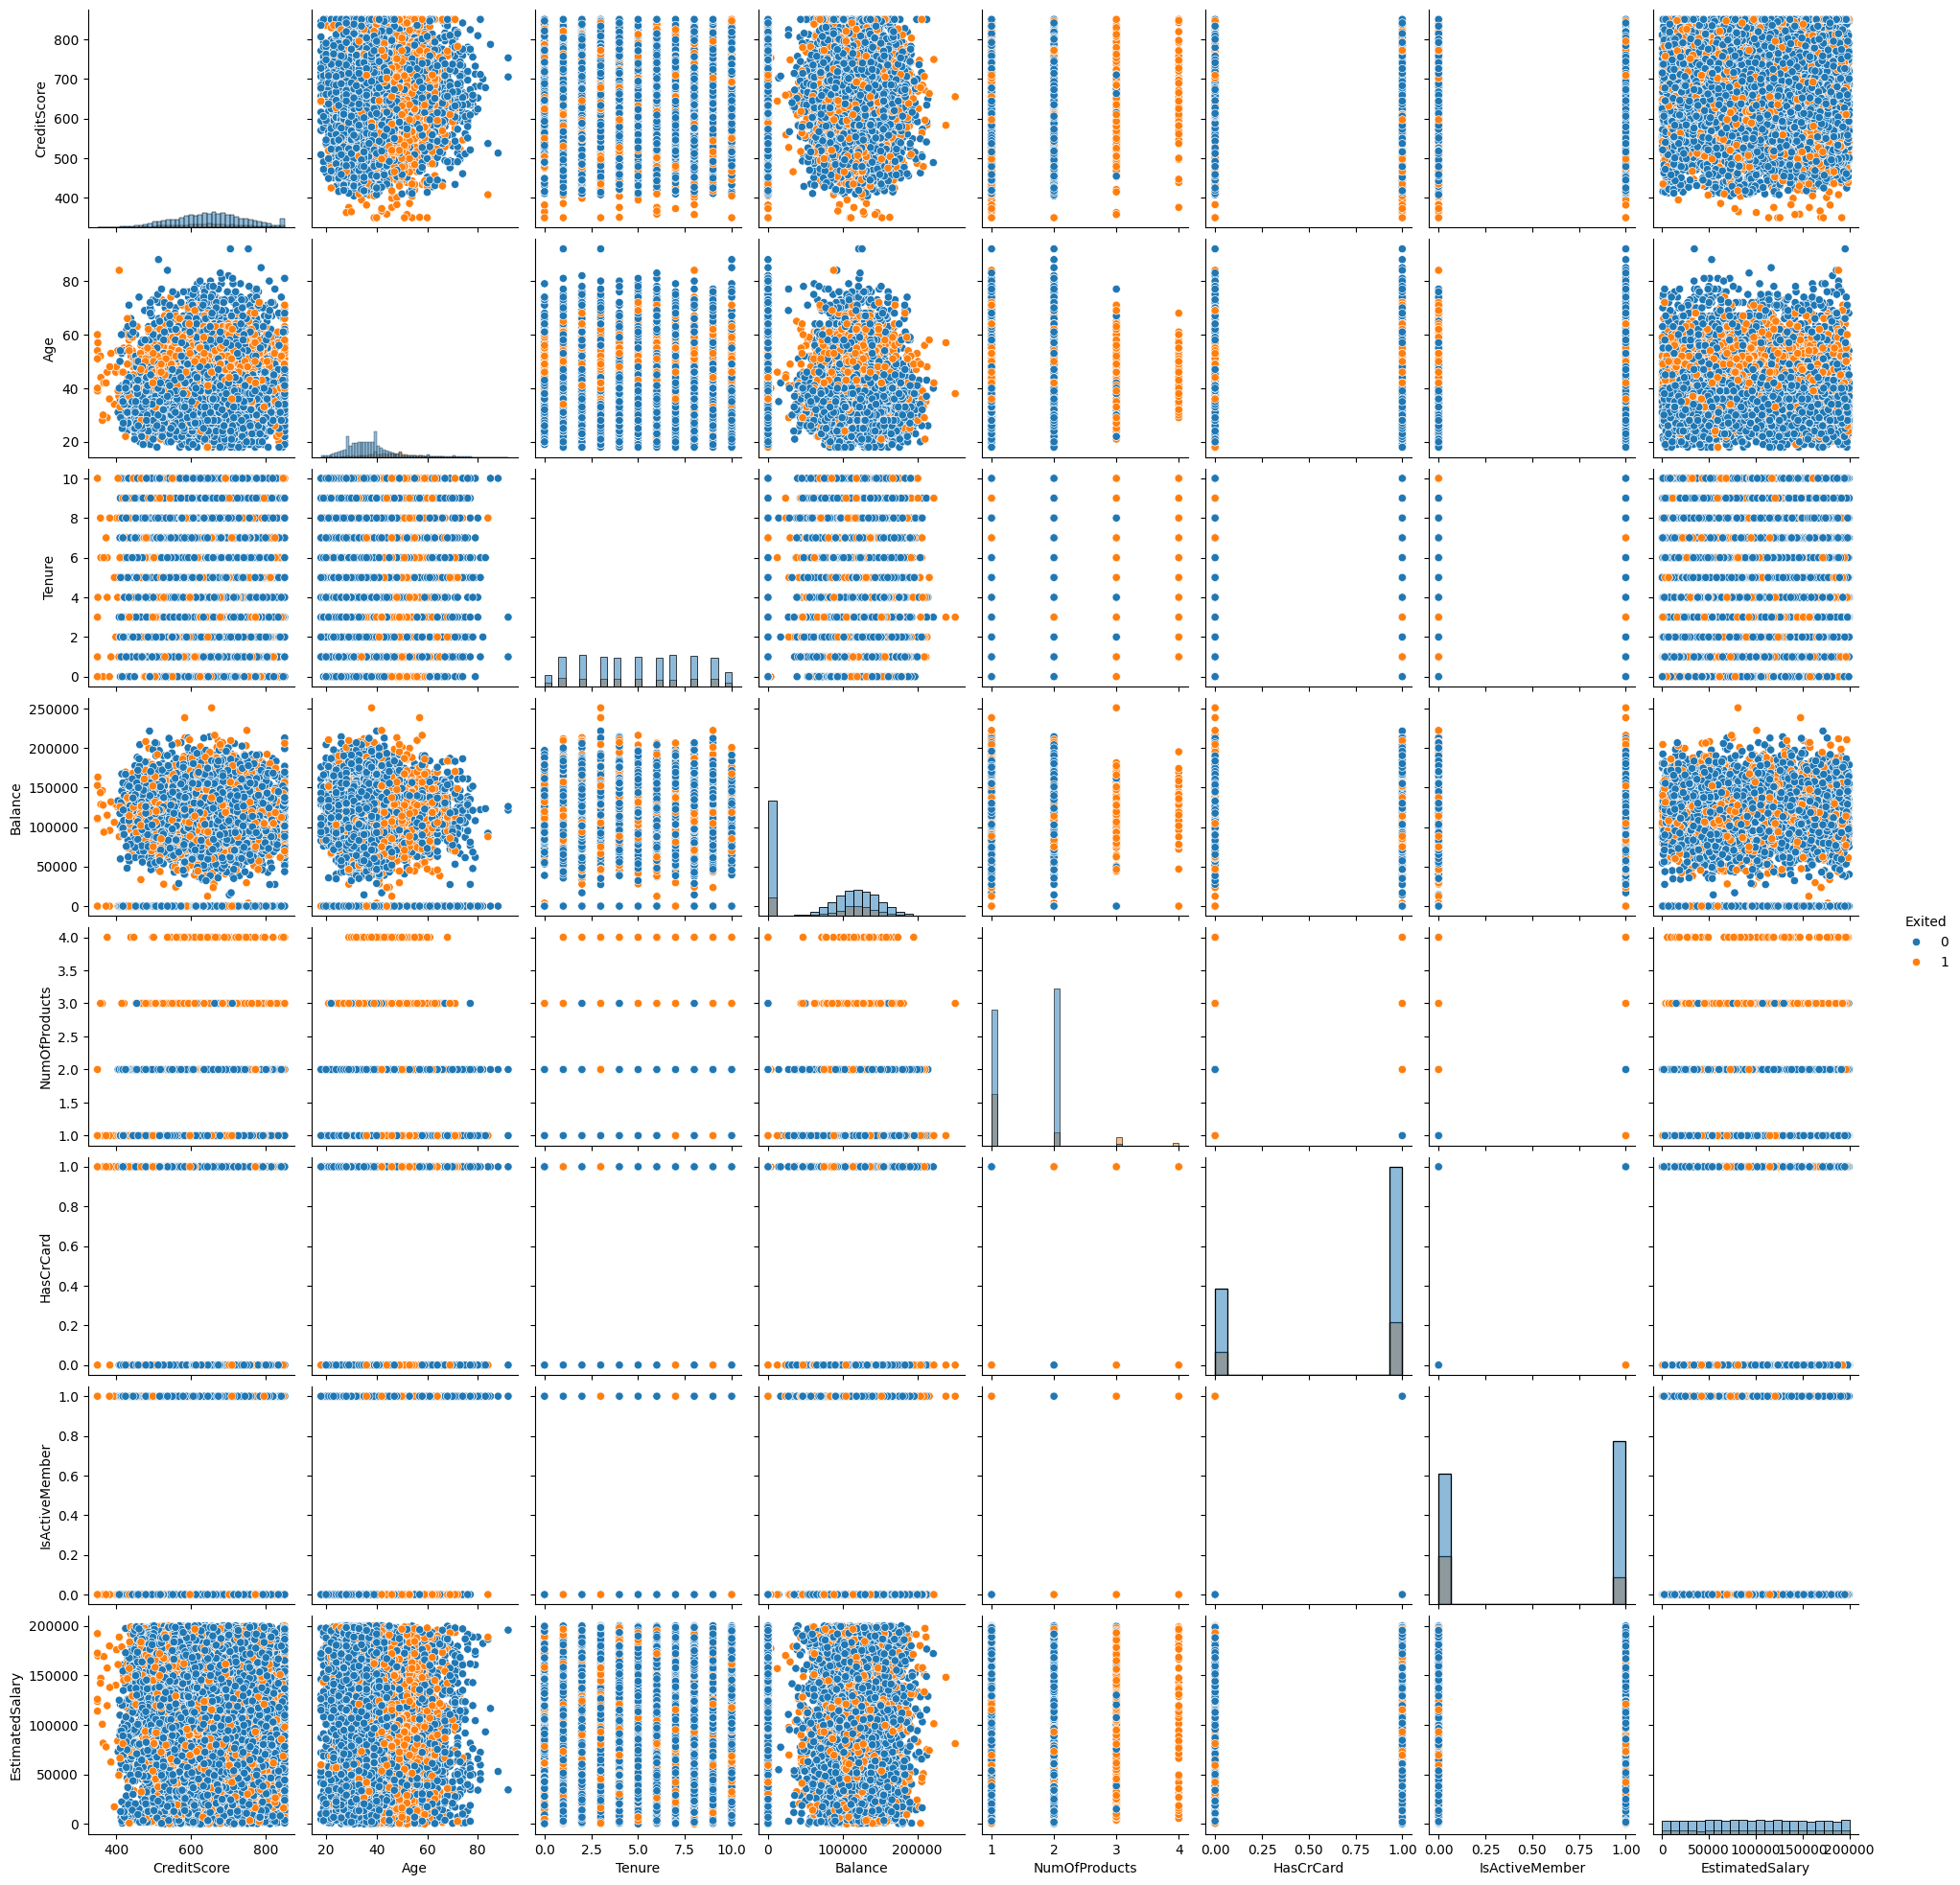

In [ ]:
sns.pairplot(Data, hue = 'Exited' , diag_kind='hist')

* Most the customers that left the bank where in the age range between 40-60 years of age
* Most of the customers that left the bank had multiple credits cards (3 or more)
* As the number of products that a customer has purchased through the bank increased the customer had a high likelihood to leave the bank within the following six months.


#### Correlation Matrix

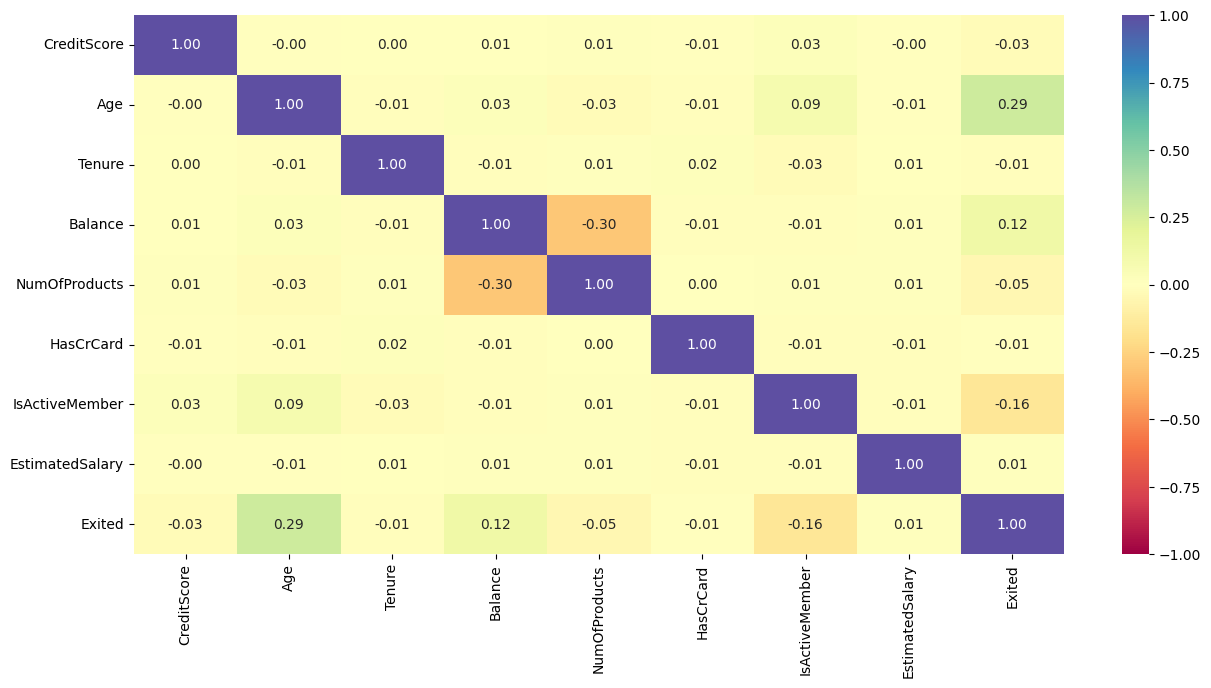

In [ ]:
plt.figure(figsize=(15, 7))
sns.heatmap(
   Data.corr(numeric_only = True), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

* There is positive correlation between Age and the target variable  , and this was in display in the pairplot.
* Also a postive correlation between number of products and balance, which is to be expected.

#### Geography vs. Exited

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


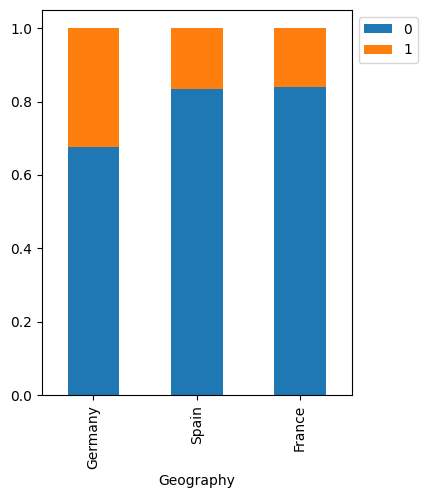

In [ ]:
stacked_barplot(Data, "Geography", "Exited")

* The customer's location was not good predictor as to the customer having left the bank within six months

#### Gender vs. Exited

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


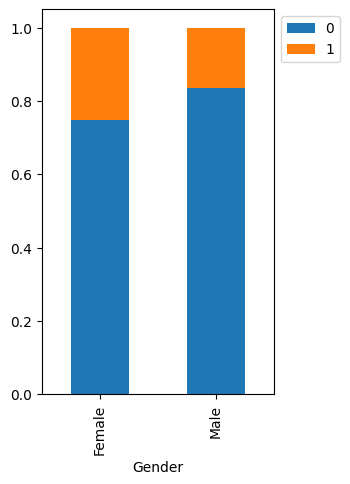

In [ ]:
stacked_barplot(Data, "Gender", "Exited")

* The customer's gender was not good predictor as to the customer having left the bank within six months

#### Ternure vs. Exited

Exited     0     1    All
Tenure                   
All     7963  2037  10000
1        803   232   1035
9        771   213    984
3        796   213   1009
5        803   209   1012
4        786   203    989
2        847   201   1048
8        828   197   1025
6        771   196    967
7        851   177   1028
10       389   101    490
0        318    95    413
------------------------------------------------------------------------------------------------------------------------


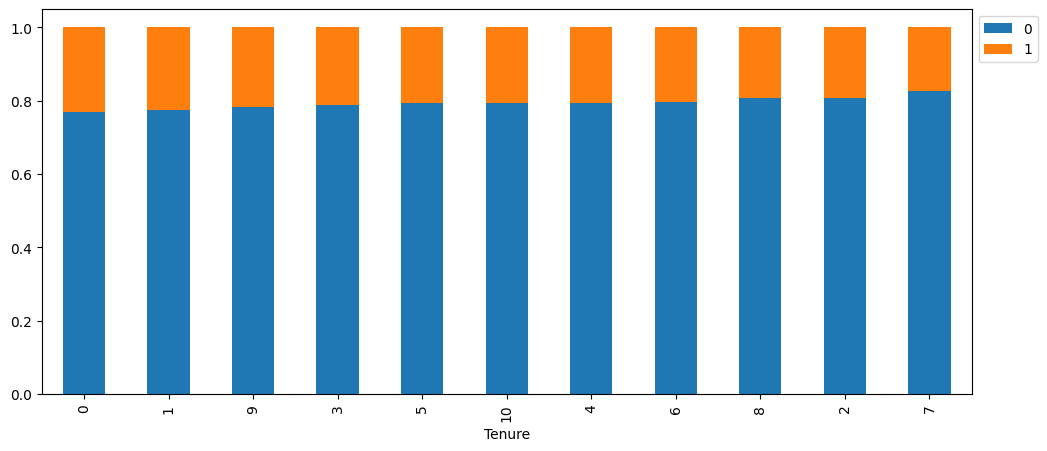

In [ ]:
stacked_barplot(Data, "Tenure", "Exited")

* The number of years for which the customer has been with the bank is not a predictor for the customer leaving the bank within the following six month.



#### Balances vs. Exited

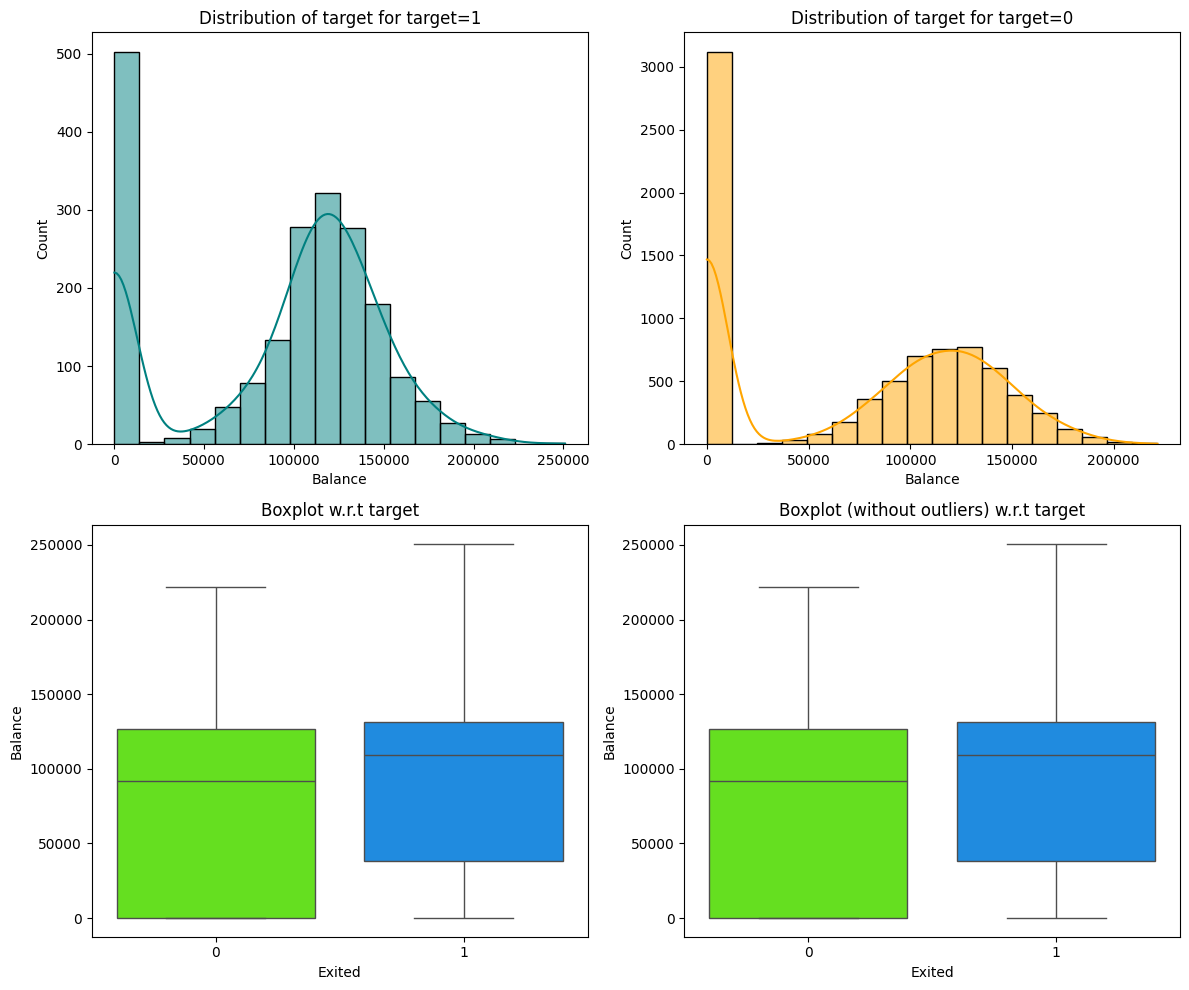

In [ ]:
distribution_plot_wrt_target(Data, "Balance", "Exited")

* More customers with higher balances left bank within the next six month.

#### Number of Products vs. Exited

Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


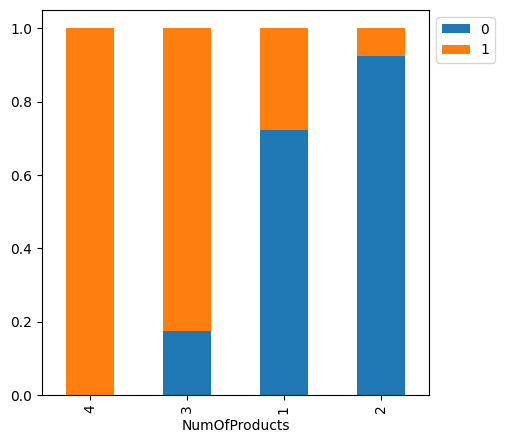

In [ ]:
stacked_barplot(Data, "NumOfProducts", "Exited")

* As the number of products that a customer has purchased through the bank increased the customer had a higher likelihood to leave the bank within the following six months.


#### Has a Credit Card vs. Exited

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


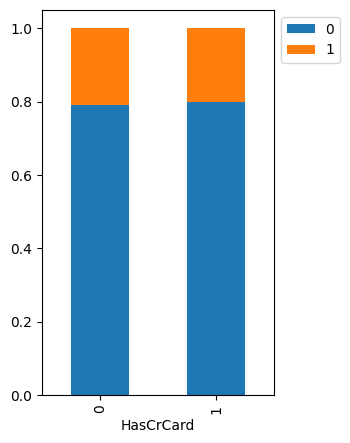

In [ ]:
stacked_barplot(Data, "HasCrCard", "Exited")

* Whether a customer has a credit card or not was not a good predictor as to the customer having left the bank within six months

#### Is Active Member vs. Exited

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


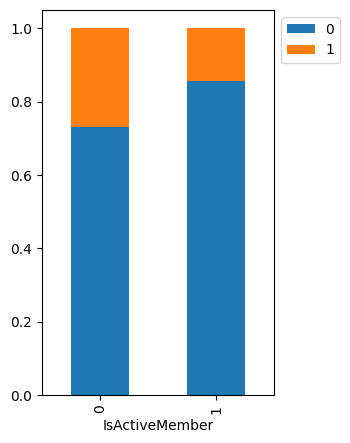

In [ ]:
stacked_barplot(Data, "IsActiveMember", "Exited")

* Whether a customer was active or not was not a good predictor as to the customer having left the bank within six months

## Data Preprocessing

#### Column Binning

In [ ]:
## Function for binning Age
def bin(x):
    if x>=90:
      return '>=90'
    elif x in [i for i in range(70,89)]:
      return '70-89'
    elif x in [i for i in range(60,70)]:
      return '60-69'
    elif x in [i for i in range(50,60)]:
      return '50-59'
    elif x in [i for i in range(40,50)]:
      return '40-49'
    elif x in [i for i in range(30,40)]:
      return '30-39'
    elif x in [i for i in range(20,30)]:
      return '20-29'
    elif x<20:
      return '<20'
    else:
      return 'No Age'

In [ ]:
# Applying function for Binning on Age column
Data["Age"] = Data["Age"].apply(bin)

In [ ]:
Data.head()

CreditScore Geography  Gender    Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female  40-49       2       0.00              1   
1          608     Spain  Female  40-49       1   83807.86              1   
2          502    France  Female  40-49       8  159660.80              3   
3          699    France  Female  30-39       1       0.00              2   
4          850     Spain  Female  40-49       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [ ]:
Data["Age"].unique()

array(['40-49', '30-39', '50-59', '20-29', '60-69', '<20', '70-89',
       '>=90'], dtype=object)

In [ ]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  object 
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(6), object(3)
memory usage: 859.5+ KB


#### Missing Values

In [ ]:
# Double checking if any null values in the dataset
Data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#### Separating Independent and Dependent Columns

In [ ]:
X = Data.drop(['Exited'],axis=1)
Y = Data['Exited']

### Dummy Variable Creation

In [ ]:
# Convert  list columns from object to catergorical variables
for column in ['Geography', 'Gender', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']:
    X[column] = X[column].astype('category')


In [ ]:
# Create dummy variables for categorical columns in X
categorical_cols = ['Geography', 'Gender', 'Age', 'Tenure', 'NumOfProducts', 'HasCrCard', 'IsActiveMember']
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [ ]:
X.head()

CreditScore    Balance  EstimatedSalary  Geography_Germany  \
0          619       0.00        101348.88              False   
1          608   83807.86        112542.58              False   
2          502  159660.80        113931.57              False   
3          699       0.00         93826.63              False   
4          850  125510.82         79084.10              False   

   Geography_Spain  Gender_Male  Age_30-39  Age_40-49  Age_50-59  Age_60-69  \
0            False        False      False       True      False      False   
1             True        False      False       True      False      False   
2            False        False      False       True      False      False   
3            False        False       True      False      False      False   
4             True        False      False       True      False      False   

   ...  Tenure_6  Tenure_7  Tenure_8  Tenure_9  Tenure_10  NumOfProducts_2  \
0  ...     False     False     False     False      False            False   
1  ...     False     False     False     False      False            False   
2  ...     False     False      True     False      False            False   
3  ...     False     False     False     False      False             True   
4  ...     False     False     False     False      False            False   

   NumOfProducts_3  NumOfProducts_4  HasCrCard_1  IsActiveMember_1  
0            False            False         True              True  
1            False            False        False              True  
2             True            False         True             False  
3            False            False        False             False  
4            False            False         True              True  

[5 rows x 28 columns]

In [ ]:
# Covert to Float to also include all columns after creating dummy variables.
X = X.astype(float)

In [ ]:
X.head()

CreditScore    Balance  EstimatedSalary  Geography_Germany  \
0        619.0       0.00        101348.88                0.0   
1        608.0   83807.86        112542.58                0.0   
2        502.0  159660.80        113931.57                0.0   
3        699.0       0.00         93826.63                0.0   
4        850.0  125510.82         79084.10                0.0   

   Geography_Spain  Gender_Male  Age_30-39  Age_40-49  Age_50-59  Age_60-69  \
0              0.0          0.0        0.0        1.0        0.0        0.0   
1              1.0          0.0        0.0        1.0        0.0        0.0   
2              0.0          0.0        0.0        1.0        0.0        0.0   
3              0.0          0.0        1.0        0.0        0.0        0.0   
4              1.0          0.0        0.0        1.0        0.0        0.0   

   ...  Tenure_6  Tenure_7  Tenure_8  Tenure_9  Tenure_10  NumOfProducts_2  \
0  ...       0.0       0.0       0.0       0.0        0.0              0.0   
1  ...       0.0       0.0       0.0       0.0        0.0              0.0   
2  ...       0.0       0.0       1.0       0.0        0.0              0.0   
3  ...       0.0       0.0       0.0       0.0        0.0              1.0   
4  ...       0.0       0.0       0.0       0.0        0.0              0.0   

   NumOfProducts_3  NumOfProducts_4  HasCrCard_1  IsActiveMember_1  
0              0.0              0.0          1.0               1.0  
1              0.0              0.0          0.0               1.0  
2              1.0              0.0          1.0               0.0  
3              0.0              0.0          0.0               0.0  
4              0.0              0.0          1.0               1.0  

[5 rows x 28 columns]

### Train-Validation-Test Split

In [ ]:
# Splitting the dataset into the Training and Test set.
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 1,stratify = Y)

In [ ]:
# Splitting the Train dataset into the Training and Validation set.
X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train, test_size = 0.2, random_state = 1,stratify = y_train)

In [ ]:
#Printing the shapes.
print(X_train.shape,y_train.shape)
print(X_valid.shape,y_valid.shape)
print(X_test.shape,y_test.shape)

(6400, 28) (6400,)
(1600, 28) (1600,)
(2000, 28) (2000,)


#### Converting Target DF to an Array

In [ ]:
# Converting Train, Validation and Test Dataframes to a Numpy Array.
# Neural Networks and deep learning frameworks like TensorFlow and PyTorch operate
# efficiently on NumPy arrays.
y_train = y_train.to_numpy()
y_valid = y_valid.to_numpy()
y_test = y_test.to_numpy()

### Data Normalization

In [ ]:
# Instantiating the Standard Scaler method
transformer = StandardScaler()

#### Normalizing In Train, Validation and Test Dataframes - Independently

In [ ]:
#Train Dataframe - Standardizing the numerical variables to zero mean and unit variance

X_train[["CreditScore","Balance","EstimatedSalary"]] = transformer.fit_transform(X_train[["CreditScore","Balance","EstimatedSalary"]])

In [ ]:
#Validation Dataframe - Standardizing the numerical variables to zero mean and unit variance

X_valid[["CreditScore","Balance","EstimatedSalary"]] = transformer.fit_transform(X_valid[["CreditScore","Balance","EstimatedSalary"]])

In [ ]:
#Test Dataframe - Standardizing the numerical variables to zero mean and unit variance

X_test[["CreditScore","Balance","EstimatedSalary"]] = transformer.fit_transform(X_test[["CreditScore","Balance","EstimatedSalary"]])

In [ ]:
X_train.head()

CreditScore   Balance  EstimatedSalary  Geography_Germany  \
5292     0.976155 -1.212523         0.939366                0.0   
3879     1.316949  1.214872         1.389376                0.0   
6118    -0.190810  1.473810         0.692477                0.0   
4044     0.077695 -1.212523        -0.347954                0.0   
3202    -0.893054  0.961751        -0.647963                0.0   

      Geography_Spain  Gender_Male  Age_30-39  Age_40-49  Age_50-59  \
5292              0.0          0.0        0.0        0.0        0.0   
3879              0.0          0.0        1.0        0.0        0.0   
6118              0.0          0.0        0.0        1.0        0.0   
4044              0.0          1.0        1.0        0.0        0.0   
3202              0.0          0.0        1.0        0.0        0.0   

      Age_60-69  ...  Tenure_6  Tenure_7  Tenure_8  Tenure_9  Tenure_10  \
5292        0.0  ...       1.0       0.0       0.0       0.0        0.0   
3879        0.0  ...       0.0       0.0       0.0       1.0        0.0   
6118        0.0  ...       0.0       0.0       0.0       0.0        0.0   
4044        0.0  ...       0.0       0.0       1.0       0.0        0.0   
3202        0.0  ...       0.0       0.0       0.0       0.0        0.0   

      NumOfProducts_2  NumOfProducts_3  NumOfProducts_4  HasCrCard_1  \
5292              1.0              0.0              0.0          1.0   
3879              1.0              0.0              0.0          0.0   
6118              0.0              0.0              0.0          0.0   
4044              0.0              0.0              0.0          1.0   
3202              0.0              0.0              0.0          1.0   

      IsActiveMember_1  
5292               0.0  
3879               0.0  
6118               0.0  
4044               1.0  
3202               0.0  

[5 rows x 28 columns]

In [ ]:
X_valid.head()

CreditScore   Balance  EstimatedSalary  Geography_Germany  \
6919     1.401481  1.808939         1.223619                0.0   
7849    -0.043995  1.224066        -0.838984                1.0   
5810    -1.583062 -1.249922         0.579594                0.0   
594      1.370283  1.534155        -1.038777                0.0   
2485     1.099907  1.022202        -1.118999                0.0   

      Geography_Spain  Gender_Male  Age_30-39  Age_40-49  Age_50-59  \
6919              0.0          1.0        1.0        0.0        0.0   
7849              0.0          1.0        0.0        1.0        0.0   
5810              1.0          0.0        0.0        1.0        0.0   
594               1.0          0.0        0.0        0.0        0.0   
2485              0.0          0.0        1.0        0.0        0.0   

      Age_60-69  ...  Tenure_6  Tenure_7  Tenure_8  Tenure_9  Tenure_10  \
6919        0.0  ...       0.0       1.0       0.0       0.0        0.0   
7849        0.0  ...       0.0       1.0       0.0       0.0        0.0   
5810        0.0  ...       0.0       1.0       0.0       0.0        0.0   
594         0.0  ...       0.0       0.0       0.0       0.0        0.0   
2485        0.0  ...       1.0       0.0       0.0       0.0        0.0   

      NumOfProducts_2  NumOfProducts_3  NumOfProducts_4  HasCrCard_1  \
6919              0.0              0.0              0.0          1.0   
7849              0.0              0.0              0.0          1.0   
5810              1.0              0.0              0.0          0.0   
594               1.0              0.0              0.0          0.0   
2485              0.0              0.0              0.0          0.0   

      IsActiveMember_1  
6919               1.0  
7849               1.0  
5810               0.0  
594                1.0  
2485               1.0  

[5 rows x 28 columns]

### Converting Train, Validation and Test DF to Arrays

In [ ]:
# Converting Train, Validation and Test Dataframes to a Numpy Array.
# Neural Networks and deep learning frameworks like TensorFlow and PyTorch operate
# efficiently on NumPy arrays.
X_train = X_train.to_numpy()
X_valid = X_valid.to_numpy()
X_test = X_test.to_numpy()

## Model Building

####  Plot Utility Function

In [ ]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

#### Performance Evaluation Function

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors) > threshold
    # pred_temp = model.predict(predictors) > threshold
    # # rounding off the above values to get classes
    # pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},
        index=[0],
    )

    return df_perf

#### Handling Imbalance Class Distribution

As we have are dealing with an imbalance in class distribution, we will be using class weights to allow the model to give proportionally more importance to the minority class.

In [ ]:
# Calculate class weights for imbalanced dataset
cw = (y_train.shape[0]) / np.bincount(y_train)

# Create a dictionary mapping class indices to their respective class weights
cw_dict = {}
for i in range(cw.shape[0]):
    cw_dict[i] = cw[i]

cw_dict

{0: 1.2558869701726845, 1: 4.9079754601226995}

* There is an approximate 5:1 ratio of Not Exited/ Exited representation in the Train dataset

In [ ]:
# defining the batch size and # epochs upfront as we'll be using the same values for all models
epochs = 25
batch_size = 64

#### Use k-fold cross-validation to maximize learning

In [ ]:
# defining kfold
kfold = KFold(n_splits=10, random_state=1, shuffle = True)

# number of splits = 10

### Model Evaluation Criterion

**A model can make wrong predictions in the following ways:**
* Predicting  a customer will leave the bank within 6 months
* Predicting a customer will not leave the bank within 6 months

**Which case is more important?**

* Losing a customer is more important to the bank, and predicting which customers are likely to leave will allow the bank to offer promotions to these customers.
* Is it important for the bank to know which customers are likely to remain customers of the bank within six months ? This could be as important since customer loyalty allows the bank to better forecast revenues and profits, for example.

* Both cases are important, but losing a customer has impact in finacial loses to the bank that cannot be forecasted, therefore predicting of a loss of a customer may have a higher preference to the bank.


**How to reduce this loss ?**

W need to reduce False Negatives as well as increase the True Positives. This will lead to a larger Recall. Ideally a larger F1 Score would signify that our Precision metric would alos increase, for this case it would mean correctly predicting which customers did not leave the bank which actually did not.



### Neural Network with SGD Optimizer

Let's start with a neural network consisting of
two hidden layers with 14 and 7 neurons respectively
activation function of ReLU.
SGD as the optimizer

In [ ]:
# Clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

#### Cross Validation Analyzes for NN with SGD Optimizer

In [ ]:
# Creating function to be used for Cross Validation
def create_model():
    # Instantiating SGD Optimizer
    optimizer = tf.keras.optimizers.SGD()
    #Initializing the neural network
    model = Sequential()
    model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
    model.add(Dense(7,activation="relu"))
    model.add(Dense(1,activation="sigmoid"))
    # Compile the model (you were missing this step)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


In [ ]:
from scikeras.wrappers import KerasClassifier

In [ ]:
# Wrapping the Keras model with KerasClassifier allowing cross_val_score to work as expected.
# This wrapper provides the necessary scikit-learn compatibility,

model = KerasClassifier(model=create_model, epochs=epochs, batch_size=batch_size, verbose=0, random_state=10)


In [ ]:
# storing accuracy values of model for every fold in "results"
results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

In [ ]:
results

array([0.8078125, 0.8109375, 0.790625 , 0.803125 , 0.8140625, 0.8      ,
       0.7640625, 0.790625 , 0.809375 , 0.80625  ])

In [ ]:
# let's see the mean accuracy score
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

NameError: name 'results' is not defined

 Interpretation of scores
- Mean accuracy is 79.97% with a standard deviation of 1.408%
- So, we can say that the accuracy on any unseen data will lie between 78.56% (mean - standard deviation) and 81.38% (mean + standard deviation) with a confidence of 67% using the Stochastic Gradient Descent Optimizer

#### Buiding Neural Network with SGD Optimizer

In [ ]:
# Clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

- Starting with a neural network consisting of
  - two hidden layers with 14 and 7 neurons respectively
  - activation function of ReLU.
  - SGD as the optimizer

In [ ]:
optimizer = tf.keras.optimizers.SGD()
#Initializing the neural network and creating architecture
model_sgd = Sequential()
model_sgd.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model_sgd.add(Dense(7,activation="relu"))
model_sgd.add(Dense(1,activation="sigmoid"))


In [ ]:
# Compile the model
model_sgd.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
# # Predict on Validation dataset
start = time.time()
history = model_sgd.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.6981 - loss: 0.6310 - val_accuracy: 0.7956 - val_loss: 0.5627
Epoch 2/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7963 - loss: 0.5531 - val_accuracy: 0.7962 - val_loss: 0.5206
Epoch 3/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7963 - loss: 0.5191 - val_accuracy: 0.7962 - val_loss: 0.5016
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7963 - loss: 0.5024 - val_accuracy: 0.7962 - val_loss: 0.4907
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7963 - loss: 0.4913 - val_accuracy: 0.7962 - val_loss: 0.4822
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7963 - loss: 0.4822 - val_accuracy: 0.7962 - val_loss: 0.4749
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7963 - loss: 0.4740 - val_accuracy: 0.7962 - val_loss: 0.4680
Epoch 8/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7963 - loss: 0.4664 - val_accuracy: 0.

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  14.754981756210327


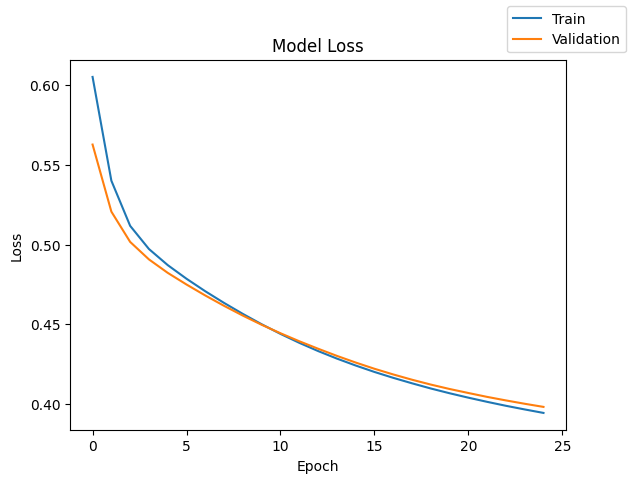

In [ ]:
# Plot for Train and Validation datasets
plot(history,'loss')

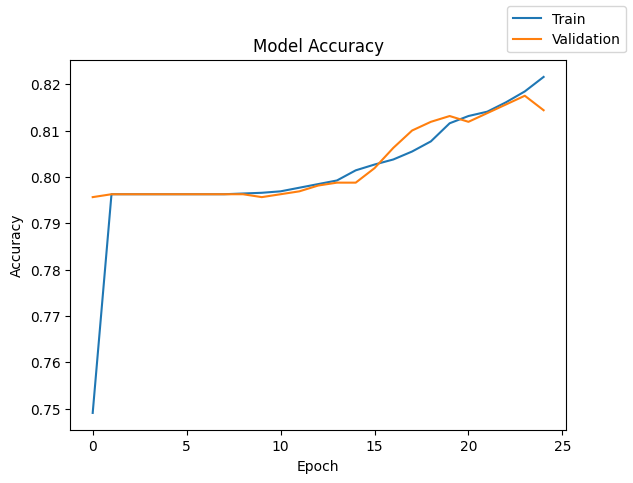

In [ ]:
# Plot for Train and Validation datasets
plot(history,'accuracy')

In [ ]:
# Predict on Test dataset
start = time.time()
history = model_sgd.fit(X_train, y_train, validation_data=(X_test,y_test) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8285 - loss: 0.3938 - val_accuracy: 0.5715 - val_loss: 3013.5498
Epoch 2/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8311 - loss: 0.3920 - val_accuracy: 0.3250 - val_loss: 3116.2236
Epoch 3/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8316 - loss: 0.3902 - val_accuracy: 0.3065 - val_loss: 3302.6665
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8338 - loss: 0.3886 - val_accuracy: 0.3025 - val_loss: 3502.0930
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8353 - loss: 0.3871 - val_accuracy: 0.2990 - val_loss: 3714.7075
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8357 - loss: 0.3858 - val_accuracy: 0.2950 - val_loss: 3866.5969
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8352 - loss: 0.3845 - val_accuracy: 0.2920 - val_loss: 4032.2563
Epoch 8/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8375 - loss: 0.38

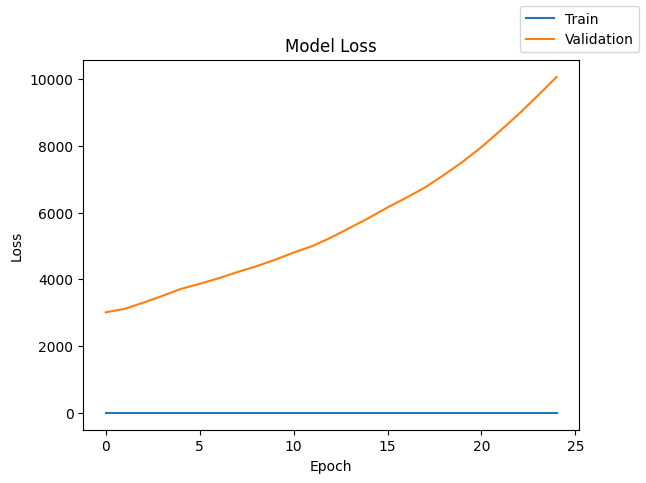

In [ ]:
# Plot for Train and Test datasets
plot(history,'loss')

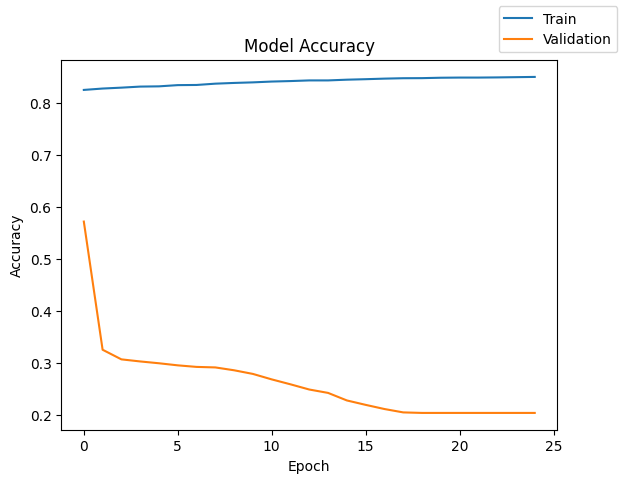

In [ ]:
# Plot for Train and Test datasets
plot(history,'accuracy')

#### Perfomance Measurements for NN with SGD Optimizer

In [ ]:
# Performance numbers on Train Dataset
model_sgd_train_perf = model_performance_classification(model_sgd, X_train, y_train)
model_sgd_train_perf

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.849531  0.849531   0.837308  0.834409

In [ ]:
model_sgd_valid_perf = model_performance_classification(model_sgd, X_valid, y_valid)
model_sgd_valid_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Accuracy  Recall  Precision  F1 Score
0    0.8375  0.8375   0.821699  0.820202

In [ ]:
# Performance numbers on Test Dataset
model_sgd_test_perf = model_performance_classification(model_sgd, X_test, y_test)
model_sgd_test_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


Accuracy  Recall  Precision  F1 Score
0    0.2035  0.2035   0.041412   0.06882

- Recall on Test dataset resulted in 20.35% and Accuracy was 20.35%


#### Hyperparameter Tunning to Minimize Loss Function

In [ ]:
# Installing Keras Tuner to import RandomSearch library for hyperparameter tuning
!pip install keras-tuner

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 6.5 MB/s eta 0:00:00


In [ ]:
# Importing Libaries
from kerastuner.tuners import RandomSearch
from tensorflow import keras

In [ ]:
# Function to build model

def build_model(hp):
    optimizer = tf.keras.optimizers.SGD()
    tf.random.set_seed(42)
    model = keras.Sequential()
    model.add(keras.layers.Dense(hp.Int('units', 32, 256, step=32), activation='relu', input_shape=(X_train.shape[1],)))

    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(keras.layers.Dense(hp.Int(f'units_{i}', 32, 256, step=32), activation='relu'))

    model.add(keras.layers.Dense(1, activation='sigmoid'))  # Output layer for binary classification

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

tuner = RandomSearch(build_model, objective='val_accuracy', max_trials=10)
tuner.search(X_train, y_train, epochs=35, validation_split=0.2)

Reloading Tuner from ./untitled_project/tuner0.json


In [ ]:
tuner.results_summary()

Results summary
Results in ./untitled_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 02 summary
Hyperparameters:
units: 128
num_layers: 2
units_0: 192
units_1: 256
units_2: 32
Score: 0.86328125

Trial 04 summary
Hyperparameters:
units: 160
num_layers: 2
units_0: 64
units_1: 256
units_2: 192
Score: 0.862500011920929

Trial 01 summary
Hyperparameters:
units: 160
num_layers: 1
units_0: 224
units_1: 32
units_2: 160
Score: 0.8617187738418579

Trial 09 summary
Hyperparameters:
units: 256
num_layers: 1
units_0: 256
units_1: 64
units_2: 128
Score: 0.8578125238418579

Trial 06 summary
Hyperparameters:
units: 128
num_layers: 2
units_0: 128
units_1: 32
units_2: 224
Score: 0.8570312261581421

Trial 05 summary
Hyperparameters:
units: 192
num_layers: 1
units_0: 128
units_1: 160
units_2: 32
Score: 0.856249988079071

Trial 08 summary
Hyperparameters:
units: 256
num_layers: 1
units_0: 32
units_1: 160
units_2: 224
Score: 0.85546875

Trial 03 summary
Hyperparameters

* Trial 04 summary
* Hyperparameters:
* units: 256
* num_layers: 1
* units_0: 160
* units_1: 32
* units_2: 224
* Score: 0.86328125

Interpretation:
How the architecture looks based on these hyperparameters:
- Hidden Layer 1 → 128 neurons, ReLU activation (assuming default ReLU)
- Output Layer → 1 neuron (binary classification) or softmax (multi-class)


#### Buiding Neural Network with SGD Optimizer with Best Parameters

In [ ]:
# Clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
# Recreating Optimizer Instance
optimizer = tf.keras.optimizers.SGD()

In [ ]:
#Initializing the neural network and creating architecture based on best hyperparameters tunning
tf.random.set_seed(42)
model_sgd_tuned = Sequential()
model_sgd_tuned.add(Dense(192,activation="relu",input_dim=X_train.shape[1]))
model_sgd_tuned.add(Dense(1,activation="sigmoid"))

In [ ]:
# Compile the model
model_sgd_tuned.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
# Predict on Validation dataset
start = time.time()
history = model_sgd_tuned.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.7743 - loss: 0.5730 - val_accuracy: 0.7962 - val_loss: 0.4934
Epoch 2/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7963 - loss: 0.4868 - val_accuracy: 0.7962 - val_loss: 0.4706
Epoch 3/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.7963 - loss: 0.4687 - val_accuracy: 0.7962 - val_loss: 0.4598
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7963 - loss: 0.4587 - val_accuracy: 0.7962 - val_loss: 0.4516
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7963 - loss: 0.4507 - val_accuracy: 0.7962 - val_loss: 0.4446
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7963 - loss: 0.4438 - val_accuracy: 0.7962 - val_loss: 0.4384
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7966 - loss: 0.4375 - val_accuracy: 0.7962 - val_loss: 0.4328
Epoch 8/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.7967 - loss: 0.4319 - val_accuracy: 0

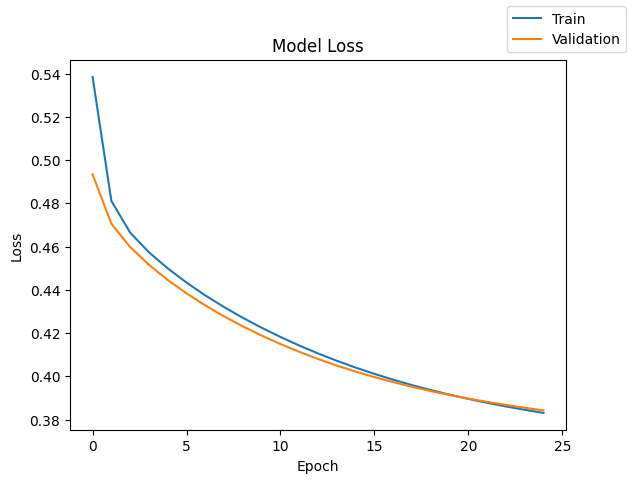

In [ ]:
plot(history,'loss')

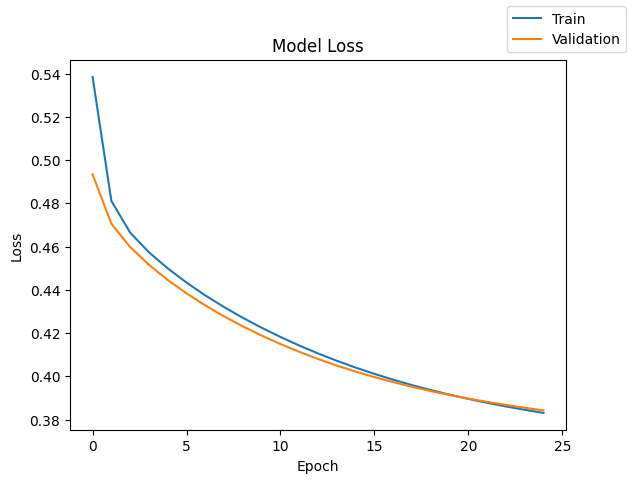

In [ ]:
plot(history,'loss')

In [ ]:
# Predict on Test dataset
start = time.time()
history = model_sgd_tuned.fit(X_train, y_train, validation_data=(X_test,y_test) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.8418 - loss: 0.3811 - val_accuracy: 0.7965 - val_loss: 3462.9316
Epoch 2/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8439 - loss: 0.3799 - val_accuracy: 0.7965 - val_loss: 3430.3809
Epoch 3/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8447 - loss: 0.3787 - val_accuracy: 0.7965 - val_loss: 3393.0715
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8452 - loss: 0.3777 - val_accuracy: 0.7965 - val_loss: 3351.6462
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8469 - loss: 0.3767 - val_accuracy: 0.7965 - val_loss: 3309.5220
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8485 - loss: 0.3757 - val_accuracy: 0.7965 - val_loss: 3262.9546
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8493 - loss: 0.3749 - val_accuracy: 0.7965 - val_loss: 3213.0938
Epoch 8/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8493 - loss: 0.3

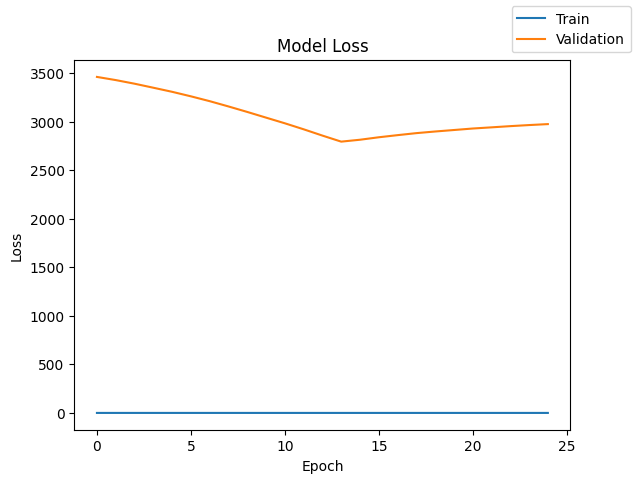

In [ ]:
plot(history,'loss')

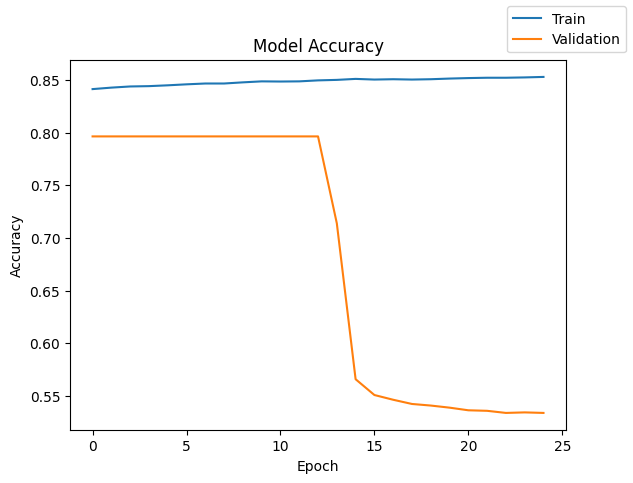

In [ ]:
plot(history,'accuracy')

#### Perfomance Measurements for NN with SGD Optimizer - Tuned

In [ ]:
# Performance numbers on Train Dataset for Tuned Model
model_sgd_tuned_train_perf = model_performance_classification(model_sgd_tuned, X_train, y_train)
model_sgd_tuned_train_perf

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.852344  0.852344   0.841451  0.835725

In [ ]:
model_sgd_tuned_valid_perf = model_performance_classification(model_sgd_tuned, X_valid, y_valid)
model_sgd_tuned_valid_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Accuracy   Recall  Precision  F1 Score
0   0.84375  0.84375   0.830388  0.824398

In [ ]:
model_sgd_tuned_test_perf = model_performance_classification(model_sgd_tuned, X_test, y_test)
model_sgd_tuned_test_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


Accuracy  Recall  Precision  F1 Score
0     0.534   0.534   0.625388  0.571873

* Recall for Test dataset improved to 53.4% from 20.0% resultant from the previous **Untuned** SGD model

* Accuracy for both Train and Validation Datasets improved to 84.83% and 84.00%, respectively, when changing  the Architecture to one Dense Hidden Layer with 192 neurons.

* Train F1 score also improved to 57.19% from 49.27% from the previous **Untuned** SGD model

* Again, these performance scores were higher than the **Untuned** model previously run.

* The Test Dataset starting diverging after Epoch =19.


## Model Performance Improvement

### Neural Network with Adam Optimizer

Starting with the same neural network architecture of the hyperparametertuned SGD Optimizer consisting of
one hidden layer with 128 neurons using activation function of ReLU and Adam as the optimizer.

In [ ]:
# Clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

#### Cross Validation Analyzes for NN with Adam Optimizer

In [ ]:
# Creating function to be used for Cross Validation with Adam optimizer
def create_model_adam():
    # Instantiating SGD Optimizer
    optimizer = tf.keras.optimizers.Adam()
    #Initializing the neural network - Sticking with the Tuned Architecture based on the SGD Optimizer
    model = Sequential()
    model.add(Dense(192,activation="relu",input_dim=X_train.shape[1]))
    model.add(Dense(1,activation="sigmoid"))
    # Compile the model (you were missing this step)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [ ]:
# Wrapping the Keras model with KerasClassifier allowing cross_val_score to work as expected.
# Epochs =35 and Batch Size = 64
# This wrapper provides the necessary scikit-learn compatibility,

model = KerasClassifier(model=create_model_adam, epochs=epochs, batch_size=batch_size, verbose=0)

In [ ]:
# storing accuracy values of model for every fold in "results"
results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

In [ ]:
results

array([0.884375 , 0.859375 , 0.8328125, 0.846875 , 0.875    , 0.8546875,
       0.8359375, 0.84375  , 0.8546875, 0.8703125])

In [ ]:
# let's see the mean accuracy score
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

Accuracy: 85.578% (1.600%)


 Interpretation of scores
- Mean accuracy is 85.58% with a standard deviation of 1.60%
- So, we can say that the accuracy on any unseen data will lie between 83.98% (mean - standard deviation) and 87.18% (mean + standard deviation) with a confidence of 67% using the Stochastic Gradient Descent with Adam Optimizer

#### Buiding SGD Neural Network with Adam Optimizer

In [ ]:
# Clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
# Instantiating Adam Optimizer
optimizer = tf.keras.optimizers.Adam()

In [ ]:
#Initializing the neural network
tf.random.set_seed(42)
model_adam = Sequential()
model_adam.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model_adam.add(Dense(7,activation="relu"))
model_adam.add(Dense(1,activation="sigmoid"))

In [ ]:
# Compile the SGD using Adam as optimizer
model_adam.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
# Predict on Train dataset
start = time.time()
history = model_adam.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.4494 - loss: 0.7130 - val_accuracy: 0.7969 - val_loss: 0.5723
Epoch 2/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7968 - loss: 0.5349 - val_accuracy: 0.7969 - val_loss: 0.4578
Epoch 3/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8002 - loss: 0.4429 - val_accuracy: 0.8181 - val_loss: 0.4009
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8349 - loss: 0.3938 - val_accuracy: 0.8325 - val_loss: 0.3780
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8487 - loss: 0.3758 - val_accuracy: 0.8406 - val_loss: 0.3707
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8503 - loss: 0.3684 - val_accuracy: 0.8431 - val_loss: 0.3675
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8494 - loss: 0.3643 - val_accuracy: 0.8413 - val_loss: 0.3658
Epoch 8/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8515 - loss: 0.3615 - val_accuracy: 0.

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  17.78816795349121


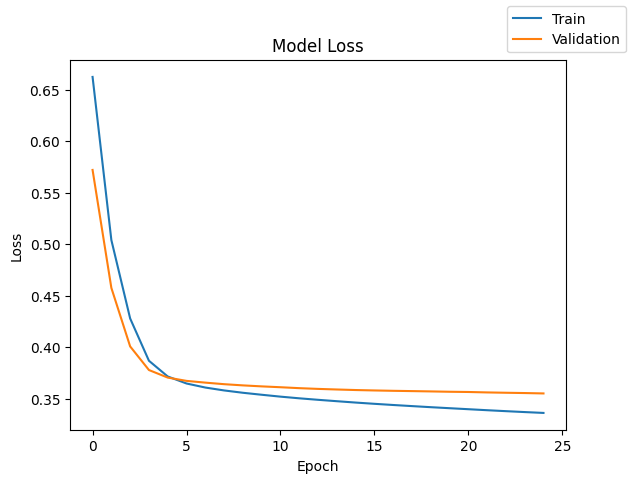

In [ ]:
# Plot for Train dataset
plot(history,'loss')

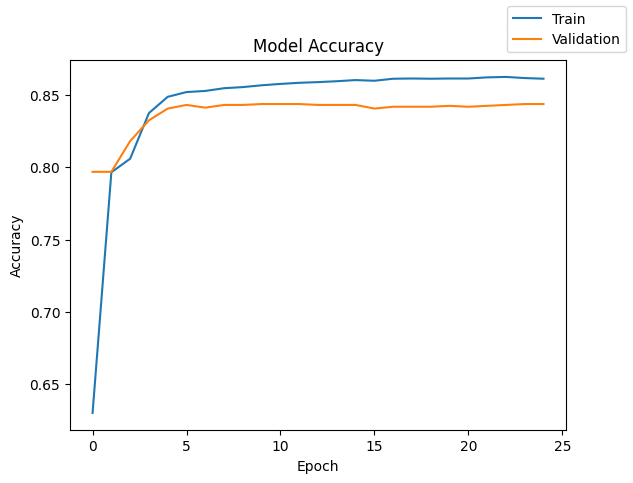

In [ ]:
# Plot for Train dataset
plot(history,'accuracy')

* The Accuracy starting diverging between Train and Validation datasets at the first epochs.
* Increased Oscillations as a result of the Learning rate bouncing back and forth and momentum not leading to the min Loss especifically in validation Dataset.
* The Train dataset is also fluctuating (bouncing) in accuracy.
* This is a sign of Overfitting as the model is learning the training data well (memorizing noise and patterns specific to it) while failing to generalize to unseen validation data.
* Validation dataset did not converge to a smaller Loss as did the training dataset. This may be due to : 1. Data imbalance 2. the Adma optimizer adapts learning rates for EACH parameter, which sometimes leads to poor generalization. 3. Adam might lead to sharp minima in the training loss landscape, which might not generalize well to unseen data.


In [ ]:
# Predict on Test dataset
start = time.time()
history = model_adam.fit(X_train, y_train, validation_data=(X_test,y_test) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8612 - loss: 0.3398 - val_accuracy: 0.2045 - val_loss: 25211.9043
Epoch 2/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8621 - loss: 0.3390 - val_accuracy: 0.2050 - val_loss: 25763.7539
Epoch 3/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8626 - loss: 0.3382 - val_accuracy: 0.2050 - val_loss: 26428.0449
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8633 - loss: 0.3374 - val_accuracy: 0.2050 - val_loss: 27113.6621
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8638 - loss: 0.3366 - val_accuracy: 0.2050 - val_loss: 27628.4648
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8641 - loss: 0.3359 - val_accuracy: 0.2050 - val_loss: 28233.5078
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8652 - loss: 0.3353 - val_accuracy: 0.2050 - val_loss: 28694.8770
Epoch 8/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8669 - lo

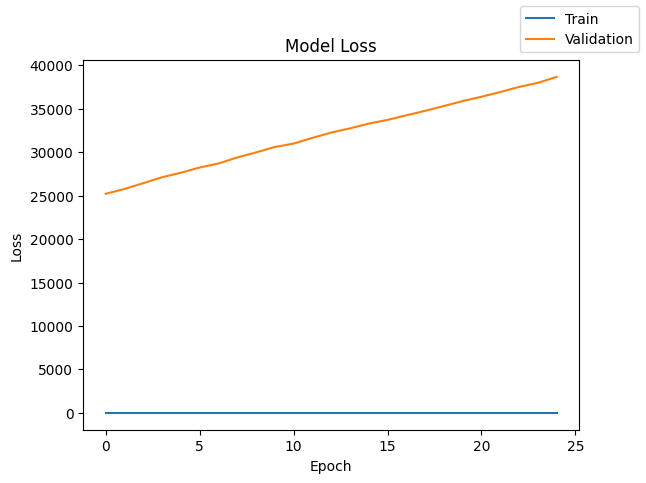

In [ ]:
# Plot for Test Dataset - Loss function increased
plot(history,'loss')

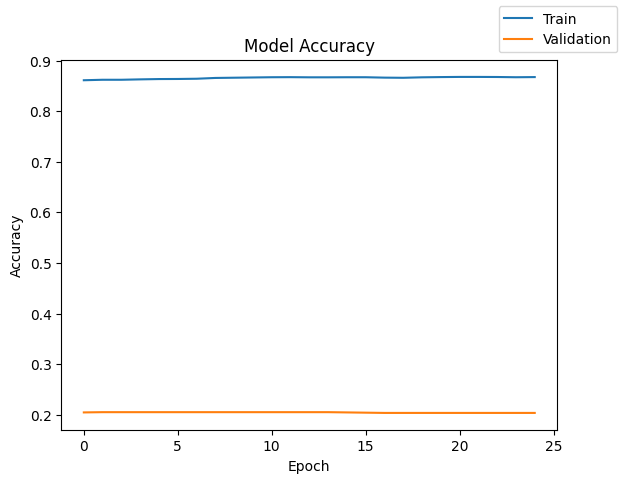

In [ ]:
# Plot for Test Dataset
plot(history,'accuracy')

#### Perfomance Measurements for NN with Adam Optimizer

In [ ]:
# Performance numbers on Train Dataset with Adam Optimizer
model_adam_train_perf = model_performance_classification(model_adam, X_train, y_train)
model_adam_train_perf

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.869844  0.869844    0.86299  0.857419

In [ ]:
# Performance numbers on Validation Dataset with Adam Optimizer
model_adam_valid_perf = model_performance_classification(model_adam, X_valid, y_valid)
model_adam_valid_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Accuracy  Recall  Precision  F1 Score
0    0.8425  0.8425   0.828291   0.82703

In [ ]:
# Performance numbers on Test Dataset with Adam Optimizer
model_adam_test_perf = model_performance_classification(model_adam, X_test, y_test)
model_adam_test_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


Accuracy  Recall  Precision  F1 Score
0    0.2035  0.2035   0.041412   0.06882


- Recall for Test dataset was 20.35% and F1 = 6.82%

- Accuracy for Test dataset was 20.35%

#### Neural Network with Adam Optimizer & Smaller Learning Rate

One the first run the Validation Dataset did not converge as expected along with the Train dataset, therefore reducing the learning rate resulted in a reduced difference between train and validation accuracies, it required a lot more time to run to yield desirable levels of performance.

In [ ]:
# Defining a Smaller Learning Rate to be applied as a parameter to the Adam optimizer
lr = 1e-4

In [ ]:
# Clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
# Instantiating Adam Optimizer and defining a lower Learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)

In [ ]:
#Initializing the neural network using Adam as optimizer and defining a lower Learning rate
tf.random.set_seed(42)
model_adam_lr = Sequential()
model_adam_lr.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model_adam_lr.add(Dense(7,activation="relu"))
model_adam_lr.add(Dense(1,activation="sigmoid"))

In [ ]:
# Compile the SGD using Adam as optimizer with Learning rate
model_adam_lr.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
# Predict on Validation datasets
start = time.time()
history = model_adam_lr.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.6743 - loss: 0.6732 - val_accuracy: 0.7362 - val_loss: 0.6611
Epoch 2/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7621 - loss: 0.6560 - val_accuracy: 0.7788 - val_loss: 0.6419
Epoch 3/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7873 - loss: 0.6367 - val_accuracy: 0.7944 - val_loss: 0.6204
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7967 - loss: 0.6153 - val_accuracy: 0.7962 - val_loss: 0.5973
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7971 - loss: 0.5927 - val_accuracy: 0.7956 - val_loss: 0.5741
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7966 - loss: 0.5701 - val_accuracy: 0.7962 - val_loss: 0.5519
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7963 - loss: 0.5487 - val_accuracy: 0.7962 - val_loss: 0.5324
Epoch 8/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7963 - loss: 0.5301 - val_accuracy: 0.

In [ ]:
# Plot for Train and Validation datasets
print("Time taken in seconds ",end-start)

Time taken in seconds  14.893860816955566


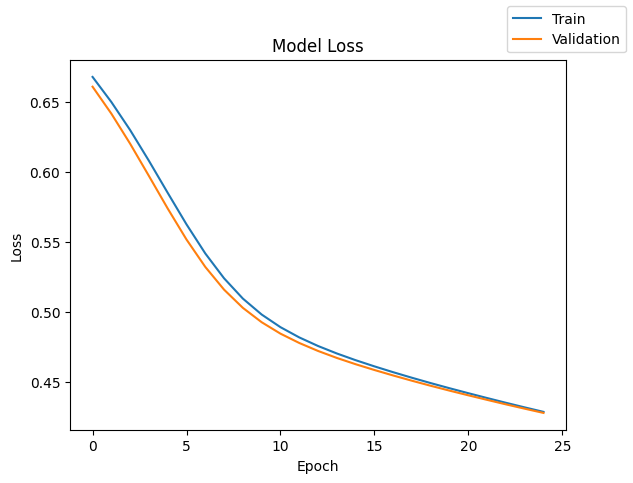

In [ ]:
# Plot for Train and Validation datasets
plot(history,'loss')

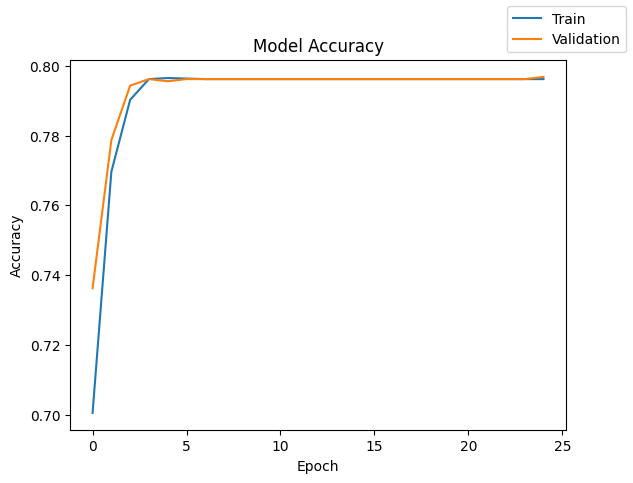

In [ ]:
# Plot for Train and Validation datasets
plot(history,'accuracy')

In [ ]:
# Predict on Test dataset
start = time.time()
history = model_adam_lr.fit(X_train, y_train, validation_data=(X_test,y_test) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7963 - loss: 0.4275 - val_accuracy: 0.7965 - val_loss: 1851.8074
Epoch 2/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7963 - loss: 0.4246 - val_accuracy: 0.7965 - val_loss: 1774.5398
Epoch 3/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7965 - loss: 0.4217 - val_accuracy: 0.7965 - val_loss: 1700.7220
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7970 - loss: 0.4189 - val_accuracy: 0.7965 - val_loss: 1629.4779
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7981 - loss: 0.4162 - val_accuracy: 0.7965 - val_loss: 1563.5363
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7998 - loss: 0.4136 - val_accuracy: 0.7965 - val_loss: 1500.8644
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8009 - loss: 0.4111 - val_accuracy: 0.7965 - val_loss: 1436.0458
Epoch 8/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8012 - loss: 0.4

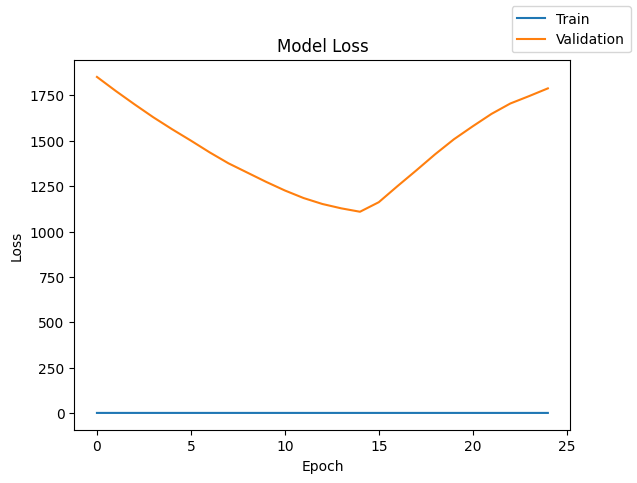

In [ ]:
# Plot for Train and Test datasets
plot(history,'loss')

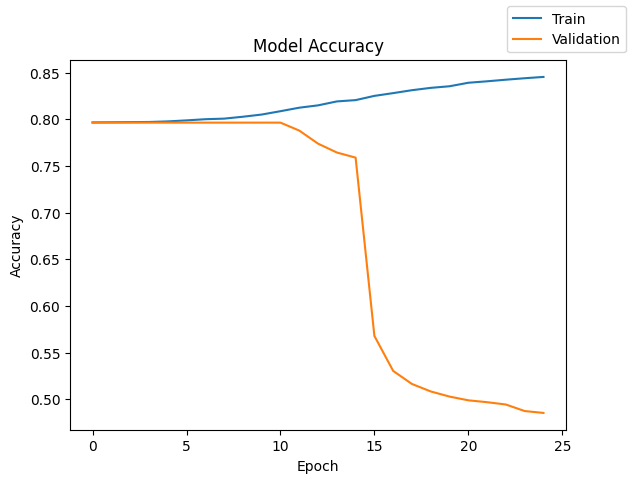

In [ ]:
# Plot for Train and Validation datasets
plot(history,'accuracy')

#### Perfomance Measurements for NN with Adam Optimizer and Learning Rate = 1e-4

In [ ]:
# Performance numbers on Train Dataset with Adam Optimizer
model_adam_lr_train_perf = model_performance_classification(model_adam_lr, X_train, y_train)
model_adam_lr_train_perf

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Accuracy    Recall  Precision  F1 Score
0  0.846094  0.846094   0.837596  0.821274

In [ ]:
model_adam_lr_valid_perf = model_performance_classification(model_adam_lr, X_valid, y_valid)
model_adam_lr_valid_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Accuracy    Recall  Precision  F1 Score
0  0.836875  0.836875   0.823109  0.810515

In [ ]:
model_adam_lr_test_perf = model_performance_classification(model_adam_lr, X_test, y_test)
model_adam_lr_test_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


Accuracy  Recall  Precision  F1 Score
0    0.4855  0.4855   0.641867  0.535607

* The Recall increased significantly to 48.55% when decreasing the Learning rate.

In [ ]:
# Function to build model

def build_model_adam(hp):
    tf.keras.backend.clear_session()
    lr = hp.Choice('learning_rate', values=[1e-3, 1e-4, 1e-5])
    optimizer = tf.keras.optimizers.Adam()
    tf.random.set_seed(42)
    model = keras.Sequential()
    model.add(keras.layers.Dense(hp.Int('units', 32, 256, step=32), activation='relu', input_shape=(X_train.shape[1],)))

    for i in range(hp.Int('num_layers', 1, 3)):
        model.add(keras.layers.Dense(hp.Int(f'units_{i}', 32, 256, step=32), activation='relu'))

    model.add(keras.layers.Dense(1, activation='sigmoid'))  # Output layer for binary classification

    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model



In [ ]:
tuner = RandomSearch(build_model_adam, objective='val_accuracy', max_trials=10)
tuner.search(X_train, y_train, epochs=35, validation_split=0.2)

In [ ]:
tuner.results_summary()

* Best Results
* Trial 06 summary
* Hyperparameters:
* learning_rate: 0.001
* units: 128
* num_layers: 2
* units_0: 64
* units_1: 224
* units_2: 128
* Score: 0.867968738079071

* Hyperparameters Breakdown:

* Learning_rate: 0.001 → The learning rate of the optimizer (likely Adam).
0.001 is a common default and balances convergence speed & stability.
* units: 128 → Likely refers to a default or the input layer's initial neuron count.
* num_layers: 2 → The model has two hidden layers.
* units_0: 64 → First hidden layer has 64 neurons.
* units_1: 224 → Second hidden layer has 224 neurons.
* units_2: 128 → Likely not used, since num_layers is 2 (only two layers are active).

#### Buiding Neural Network with Adam Optimizer with Best Parameters and Architecture based on Tuner

In [ ]:
# Clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
# Instantiating Adam Optimizer and defining best parameterfor lower Learning rate =0.0.001
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [ ]:
#Initializing the neural network using Best parameters and Architecture based on Tuner results for Adam as optimizer
tf.random.set_seed(42)
model_adam_lr_tuned = Sequential()
model_adam_lr_tuned.add(Dense(64,activation="relu",input_dim=X_train.shape[1]))
model_adam_lr_tuned.add(Dense(224,activation="relu"))
model_adam_lr_tuned.add(Dense(1,activation="sigmoid"))

In [ ]:
# Compile the SGD using Adam as optimizer with best parameterfor lower Learning rate =0.001
model_adam_lr_tuned.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
# Predict on Validation dataset
start = time.time()
history = model_adam_lr_tuned.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7533 - loss: 0.5133 - val_accuracy: 0.8369 - val_loss: 0.3833
Epoch 2/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8479 - loss: 0.3792 - val_accuracy: 0.8394 - val_loss: 0.3684
Epoch 3/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8556 - loss: 0.3611 - val_accuracy: 0.8350 - val_loss: 0.3652
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8619 - loss: 0.3518 - val_accuracy: 0.8369 - val_loss: 0.3640
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8635 - loss: 0.3453 - val_accuracy: 0.8375 - val_loss: 0.3637
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8652 - loss: 0.3401 - val_accuracy: 0.8369 - val_loss: 0.3642
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8675 - loss: 0.3357 - val_accuracy: 0.8356 - val_loss: 0.3648
Epoch 8/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8694 - loss: 0.3317 - val_accuracy: 0

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  17.986571311950684


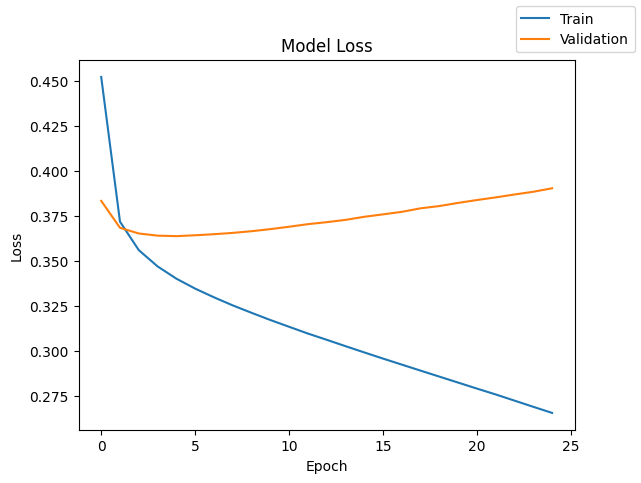

In [ ]:
# Plot for Train and Validation datasets
plot(history,'loss')

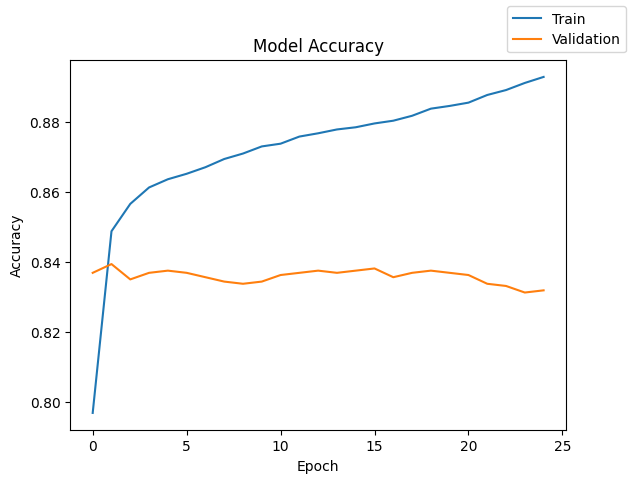

In [ ]:
# Plot for Train and Validation datasets
plot(history,'accuracy')

In [ ]:
# Predict on Test dataset
start = time.time()
history = model_adam_lr_tuned.fit(X_train, y_train, validation_data=(X_test,y_test) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8921 - loss: 0.2711 - val_accuracy: 0.2035 - val_loss: 51888.0859
Epoch 2/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8933 - loss: 0.2676 - val_accuracy: 0.2035 - val_loss: 53717.8594
Epoch 3/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8952 - loss: 0.2643 - val_accuracy: 0.2035 - val_loss: 56182.8477
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8966 - loss: 0.2610 - val_accuracy: 0.2035 - val_loss: 59642.6445
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8974 - loss: 0.2576 - val_accuracy: 0.2035 - val_loss: 59637.7109
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8988 - loss: 0.2543 - val_accuracy: 0.2035 - val_loss: 61860.4570
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8999 - loss: 0.2511 - val_accuracy: 0.2035 - val_loss: 63953.4648
Epoch 8/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9011 - lo

#### Perfomance Measurements for NN with Adam Optimizer with Best Parameters and Architecture based on Tuner

In [ ]:
# Performance numbers on Train Dataset with Adam Optimizer with Best parameters and Architecture based on Tuner results for Adam as optimizer
model_adam_lr_tuned_train_perf = model_performance_classification(model_adam_lr_tuned, X_train, y_train)
model_adam_lr_tuned_train_perf

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.932344  0.932344   0.931433   0.92958

In [ ]:
# Performance numbers on Validation Dataset with Adam Optimizer with Best parameters and Architecture based on Tuner results for Adam as optimizer
model_adam_lr_tuned_valid_perf = model_performance_classification(model_adam_lr_tuned, X_valid, y_valid)
model_adam_lr_tuned_valid_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


Accuracy    Recall  Precision  F1 Score
0  0.821875  0.821875   0.807063  0.811399

In [ ]:
# Performance numbers on Test Dataset with Adam Optimizer with Best parameters and Architecture based on Tuner results for Adam as optimizer
model_adam_lr_tuned_test_perf = model_performance_classification(model_adam_lr_tuned, X_test, y_test)
model_adam_lr_tuned_test_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


Accuracy  Recall  Precision  F1 Score
0    0.2035  0.2035   0.041412   0.06882

* Recall for the Test dataset did not Improve using the Tuner function to determine best architecture and learning rate.
* The first Adam model  has the best Recall at 48.85.
The Validation Accuracy fluctuates (bounces) while the training accuracy decreases smoothly.
*  This is sign of **Overfitting** as the model is learning the training data too well (memorizing noise and patterns specific to it) while failing to generalize to unseen validation data.

### Neural Network with Adam Optimizer and Dropout

In [ ]:
# Clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
# Reduced the Learning rate since the validation accuracy and Loss amounts were fluctuating with a higher learning rate.
lr2=1e-03

In [ ]:
# Instantiating Adam Optimizer and defining a lower Learning rate = 1e-3
optimizer = tf.keras.optimizers.Adam(learning_rate=lr2)

In [ ]:
#Initializing the neural network using Adam as optimizer and Using the NN architecture
# that best resulted for all the Adam optimizer models previously built.
# Using dropout = 0.2
tf.random.set_seed(42)
model_adam_lr_dp = Sequential()
model_adam_lr_dp.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model_adam_lr_dp.add(Dropout(0.2))
model_adam_lr_dp.add(Dense(7,activation="relu"))
model_adam_lr_dp.add(Dense(1,activation="sigmoid"))

In [ ]:
# Compile the SGD using Adam as optimizer including the Dropout Layer.
model_adam_lr_dp.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
# Run model on Validation dataset.
start = time.time()
history = model_adam_lr_dp.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.5378 - loss: 0.6863 - val_accuracy: 0.7969 - val_loss: 0.5094
Epoch 2/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7941 - loss: 0.5017 - val_accuracy: 0.7962 - val_loss: 0.4626
Epoch 3/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7981 - loss: 0.4652 - val_accuracy: 0.8006 - val_loss: 0.4362
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8022 - loss: 0.4445 - val_accuracy: 0.8106 - val_loss: 0.4141
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8171 - loss: 0.4283 - val_accuracy: 0.8256 - val_loss: 0.3969
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8303 - loss: 0.4079 - val_accuracy: 0.8356 - val_loss: 0.3820
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8365 - loss: 0.3945 - val_accuracy: 0.8388 - val_loss: 0.3733
Epoch 8/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8410 - loss: 0.3936 - val_accuracy: 0

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  18.413305521011353


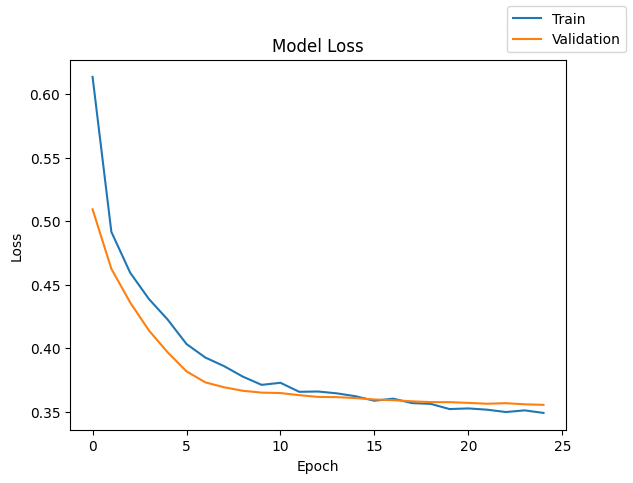

In [ ]:
# Plot for Train and Validation datasets
plot(history,'loss')

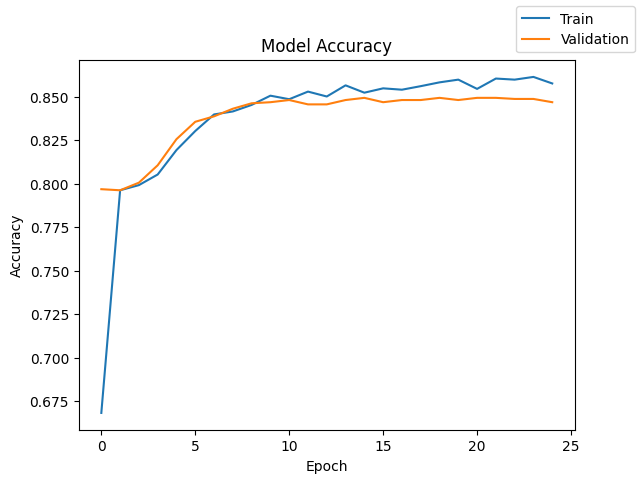

In [ ]:
# Plot for Train and Validation datasets
plot(history,'accuracy')

In [ ]:
# Run model on Test dataset.
start = time.time()
history = model_adam_lr_dp.fit(X_train, y_train, validation_data=(X_test,y_test) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8598 - loss: 0.3528 - val_accuracy: 0.2050 - val_loss: 11244.8643
Epoch 2/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8600 - loss: 0.3467 - val_accuracy: 0.2045 - val_loss: 11648.8643
Epoch 3/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8617 - loss: 0.3490 - val_accuracy: 0.2045 - val_loss: 10673.3252
Epoch 4/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8598 - loss: 0.3508 - val_accuracy: 0.2045 - val_loss: 10119.7861
Epoch 5/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8594 - loss: 0.3456 - val_accuracy: 0.2045 - val_loss: 11435.0537
Epoch 6/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8623 - loss: 0.3473 - val_accuracy: 0.2045 - val_loss: 11803.5020
Epoch 7/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8581 - loss: 0.3513 - val_accuracy: 0.2050 - val_loss: 13238.2500
Epoch 8/25
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8583 - los

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  13.721647500991821


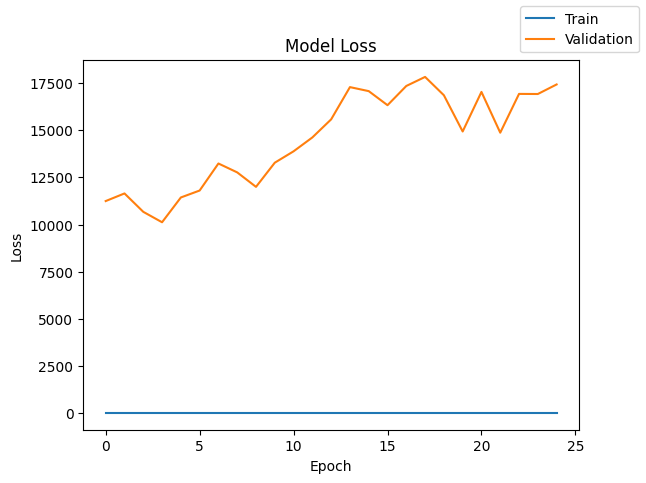

In [ ]:
# Plot for Train and Test datasets
plot(history,'loss')

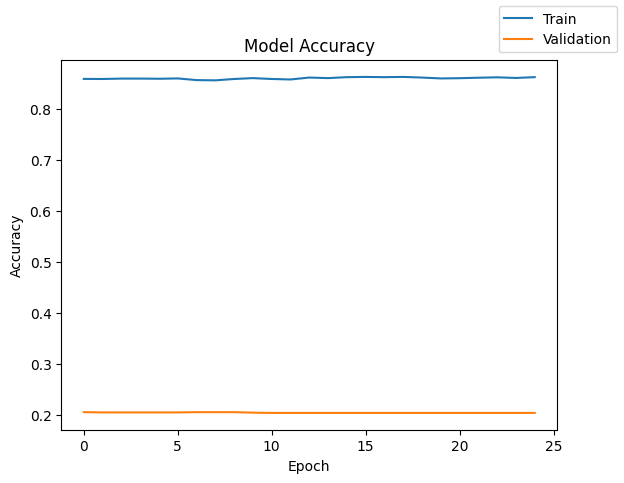

In [ ]:
# Plot for Train and Test datasets
plot(history,'accuracy')

#### Performance Measurements for Neural Network with Adam Optimizer and Dropout

In [ ]:
# Performance numbers on Train Dataset with Adam Optimizer and Architecture based on Tuner results for Adam as optimizer
model_adam_lr_dp_train_perf = model_performance_classification(model_adam_lr_dp, X_train, y_train)
model_adam_lr_dp_train_perf

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.868125  0.868125   0.861029  0.855172

In [ ]:
# Performance numbers on Validation Dataset with Adam Optimizer and Architecture based on Tuner results for Adam as optimizerr
model_adam_lr_dp_valid_perf = model_performance_classification(model_adam_lr_dp, X_valid, y_valid)
model_adam_lr_dp_valid_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy   Recall  Precision  F1 Score
0   0.84625  0.84625   0.833328  0.828904

In [ ]:
# Performance numbers on Validation Dataset with Adam Optimizer and Architecture based on Tuner results for Adam as optimizerr
model_adam_lr_dp_test_perf = model_performance_classification(model_adam_lr_dp, X_test, y_test)
model_adam_lr_dp_test_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


Accuracy  Recall  Precision  F1 Score
0    0.2035  0.2035   0.041412   0.06882

* Using a Dropout = 20% , the Recall for the Test dataset resulted in 33.85% and the F-1 Score was 36.24%
* Also adjusted the learning rate to 1-e3.
* The Loss increased as the number of epochs increased.
* The Loss function gradient kept bouncing along the gradient descent not quite fully reaching a possible minimum gradient
* Accuracy also bounced as expected.


### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
# Fit SMOTE on train data(Synthetic Minority Oversampling Technique).
# Sampling_strategy = 'auto' , whcih balances the dataset by making the minority class equal to the majority class.
sm = SMOTE(sampling_strategy=0.4, k_neighbors=5, random_state=1)
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

In [ ]:
print("Before OverSampling, count of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, count of label '0': {} \n".format(sum(y_train == 0)))

print("After OverSampling, count of label '1': {}".format(sum(y_train_over == 1)))
print("After OverSampling, count of label '0': {} \n".format(sum(y_train_over == 0)))

print("After OverSampling, the shape of train_X: {}".format(X_train_over.shape))
print("After OverSampling, the shape of train_y: {} \n".format(y_train_over.shape))

Before OverSampling, count of label '1': 1304
Before OverSampling, count of label '0': 5096 

After OverSampling, count of label '1': 2038
After OverSampling, count of label '0': 5096 

After OverSampling, the shape of train_X: (7134, 28)
After OverSampling, the shape of train_y: (7134,) 



In [ ]:
# Clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
lr2=1e-4

In [ ]:
lr2

0.0001

In [ ]:
# Recreating Optimizer Instance but with a Learning rate = 0.001 since it has been successful in previous models
optimizer = tf.keras.optimizers.SGD(learning_rate=lr2)

In [ ]:
#Initializing the neural network and using the architecture based on best hyperparameters tunning from SGD models
# Using the Oversampled minority class Train Dataset
tf.random.set_seed(42)
model_sgd_tuned_over = Sequential()
model_sgd_tuned_over.add(Dense(14,activation="relu",input_dim=X_train_over.shape[1]))
model_sgd_tuned_over.add(Dense(7,activation="relu"))
model_sgd_tuned_over.add(Dense(1,activation="sigmoid"))

In [ ]:
# Compile the model
model_sgd_tuned_over.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
# Run Model on Validation dataset
start = time.time()
history = model_sgd_tuned_over.fit(X_train_over, y_train_over, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.2923 - loss: 0.7549 - val_accuracy: 0.2169 - val_loss: 0.7739
Epoch 2/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.2963 - loss: 0.7527 - val_accuracy: 0.2181 - val_loss: 0.7710
Epoch 3/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.2986 - loss: 0.7505 - val_accuracy: 0.2225 - val_loss: 0.7682
Epoch 4/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2999 - loss: 0.7484 - val_accuracy: 0.2237 - val_loss: 0.7655
Epoch 5/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3006 - loss: 0.7463 - val_accuracy: 0.2275 - val_loss: 0.7628
Epoch 6/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3037 - loss: 0.7442 - val_accuracy: 0.2300 - val_loss: 0.7602
Epoch 7/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3058 - loss: 0.7422 - val_accuracy: 0.2338 - val_loss: 0.7576
Epoch 8/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.3064 - loss: 0.7402 - val_accuracy: 0

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  16.150248527526855


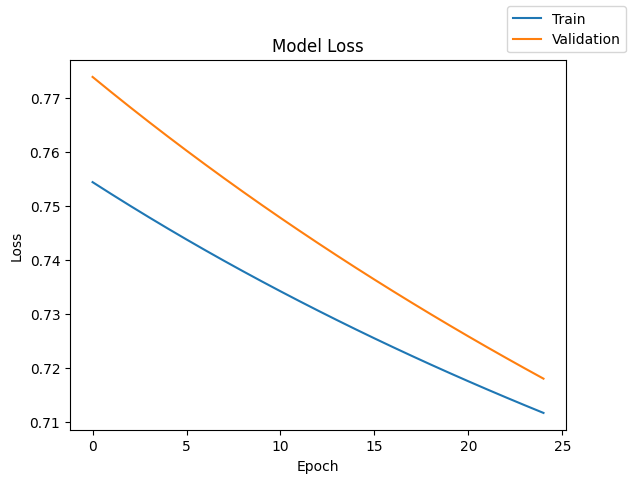

In [ ]:
# Plot for Train and Validation datasets
plot(history,'loss')

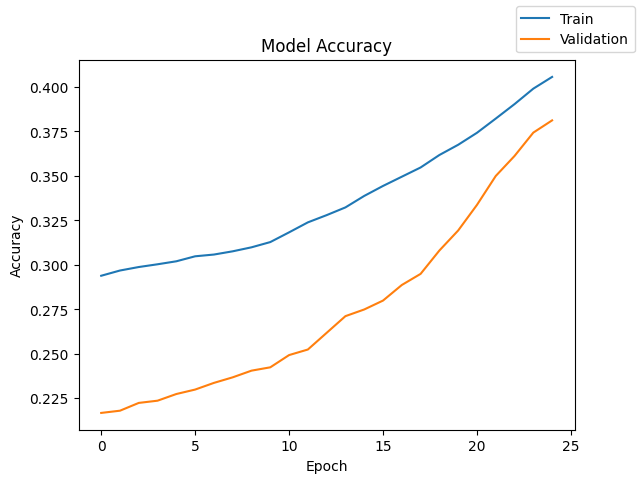

In [ ]:
# Plot for Train and Validation datasets
plot(history,'accuracy')

In [ ]:
# Run Model on Test dataset
start = time.time()
history = model_sgd_tuned_over.fit(X_train_over, y_train_over, validation_data=(X_test,y_test) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4130 - loss: 0.7104 - val_accuracy: 0.2035 - val_loss: 7521.9780
Epoch 2/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4208 - loss: 0.7090 - val_accuracy: 0.2035 - val_loss: 7459.0137
Epoch 3/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4297 - loss: 0.7077 - val_accuracy: 0.2035 - val_loss: 7396.9941
Epoch 4/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4388 - loss: 0.7063 - val_accuracy: 0.2035 - val_loss: 7335.8306
Epoch 5/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4485 - loss: 0.7050 - val_accuracy: 0.2035 - val_loss: 7275.3955
Epoch 6/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.4541 - loss: 0.7037 - val_accuracy: 0.2035 - val_loss: 7215.6665
Epoch 7/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4645 - loss: 0.7024 - val_accuracy: 0.2035 - val_loss: 7156.5903
Epoch 8/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4750 - loss: 0.70

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  14.149800777435303


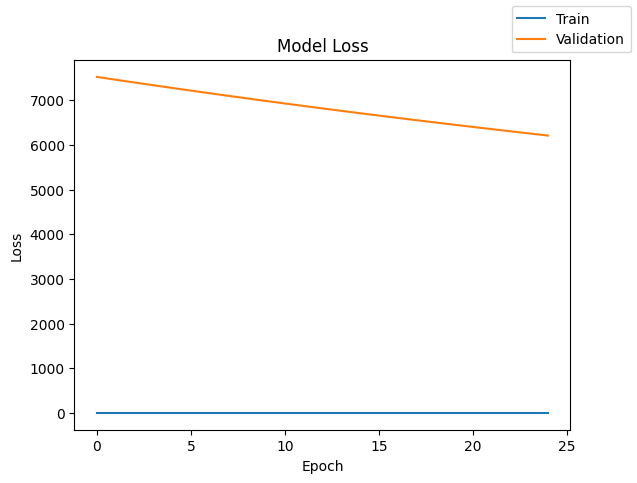

In [ ]:
# Plot for Train and Validation datasets
plot(history,'loss')

#### Performance Measurements for Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

In [ ]:
# Performance numbers on Train Dataset with SGD Optimizer.
model_sgd_tuned_over_train_perf = model_performance_classification(model_sgd_tuned_over, X_train, y_train)
model_sgd_tuned_over_train_perf

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.655312  0.655312   0.682272  0.667724

In [ ]:
# Performance numbers on Validation Dataset with SGD Optimizer.
model_sgd_tuned_over_val_perf = model_performance_classification(model_sgd_tuned_over, X_valid, y_valid)
model_sgd_tuned_over_val_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Accuracy    Recall  Precision  F1 Score
0  0.661875  0.661875   0.680516  0.670687

In [ ]:
# Performance numbers on Validation Dataset with SGD Optimizer.
model_sgd_tuned_over_test_perf = model_performance_classification(model_sgd_tuned_over, X_test, y_test)
model_sgd_tuned_over_test_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


Accuracy  Recall  Precision  F1 Score
0    0.2035  0.2035   0.041412   0.06882

* Resulted on the Best Recall for the Test Dataset for all models at 79.50%

### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

In [ ]:
# Clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network and using the architecture based on best hyperparameters tunning from Adam models
# Using the Oversampled minority class Train Dataset
tf.random.set_seed(42)
model_adam_over = Sequential()
model_adam_over.add(Dense(14,activation="relu",input_dim=X_train_over.shape[1]))
model_adam_over.add(Dense(7,activation="relu"))
model_adam_over.add(Dense(1,activation="sigmoid"))

In [ ]:
# Recreating Optimizer Instance but with a Learning rate = 0.001 since it has been successful in previous models
optimizer = tf.keras.optimizers.Adam(learning_rate=lr2)

In [ ]:
# Compile the model
model_adam_over.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
# Run Model on Validation dataset
start = time.time()
history = model_adam_over.fit(X_train_over, y_train_over, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5580 - loss: 0.6866 - val_accuracy: 0.6831 - val_loss: 0.6466
Epoch 2/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6481 - loss: 0.6535 - val_accuracy: 0.7375 - val_loss: 0.6084
Epoch 3/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6815 - loss: 0.6283 - val_accuracy: 0.7700 - val_loss: 0.5776
Epoch 4/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7029 - loss: 0.6086 - val_accuracy: 0.7869 - val_loss: 0.5528
Epoch 5/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7098 - loss: 0.5932 - val_accuracy: 0.7881 - val_loss: 0.5328
Epoch 6/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7140 - loss: 0.5808 - val_accuracy: 0.7937 - val_loss: 0.5167
Epoch 7/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7168 - loss: 0.5707 - val_accuracy: 0.7950 - val_loss: 0.5038
Epoch 8/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7197 - loss: 0.5622 - val_accuracy: 0

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  16.089404344558716


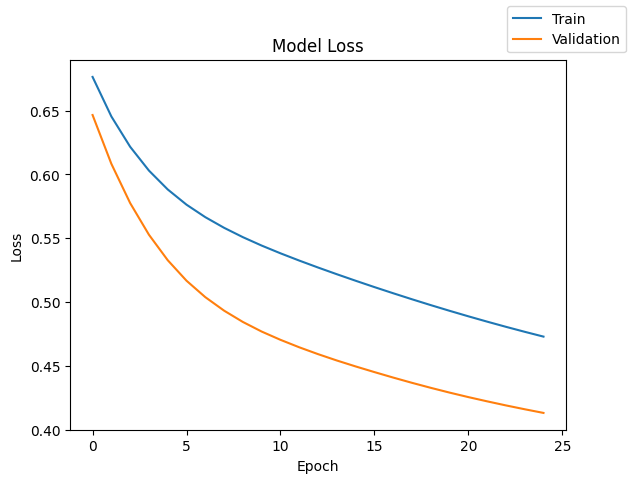

In [ ]:
# Plot for Train and Validation datasets
plot(history,'loss')

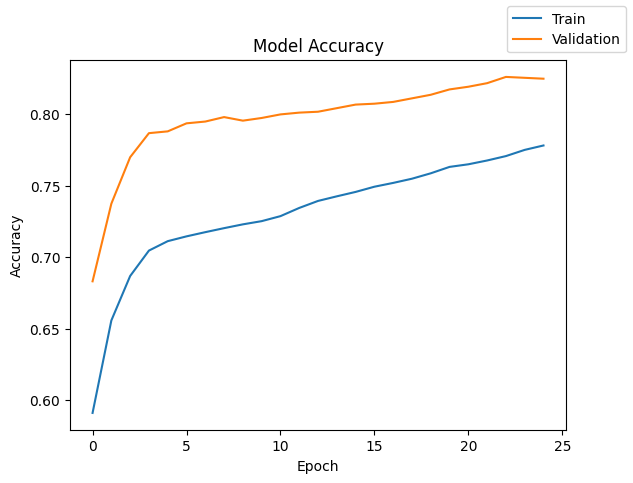

In [ ]:
# Plot for Train and Validation datasets
plot(history,'accuracy')

In [ ]:
# Run Model on Test dataset
start = time.time()
history = model_adam_over.fit(X_train_over, y_train_over, validation_data=(X_test,y_test) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7755 - loss: 0.4756 - val_accuracy: 0.4715 - val_loss: 10883.0654
Epoch 2/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7790 - loss: 0.4724 - val_accuracy: 0.4715 - val_loss: 10664.0273
Epoch 3/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7795 - loss: 0.4693 - val_accuracy: 0.4715 - val_loss: 10422.9580
Epoch 4/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7819 - loss: 0.4664 - val_accuracy: 0.4715 - val_loss: 10175.0615
Epoch 5/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7848 - loss: 0.4636 - val_accuracy: 0.4715 - val_loss: 9898.5791
Epoch 6/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7873 - loss: 0.4609 - val_accuracy: 0.4715 - val_loss: 9597.8184
Epoch 7/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7892 - loss: 0.4583 - val_accuracy: 0.4715 - val_loss: 9300.3818
Epoch 8/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7921 - loss:

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  13.95875597000122


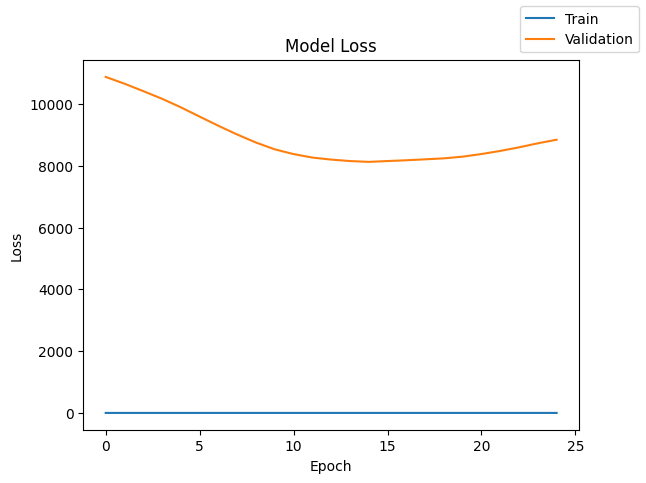

In [ ]:
# Plot for Test dataset
plot(history,'loss')

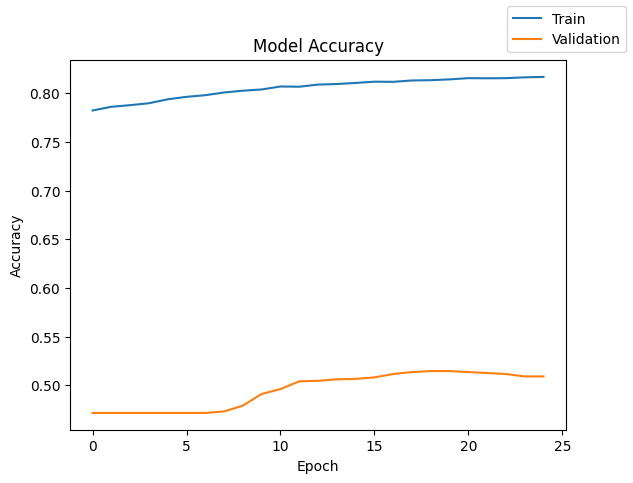

In [ ]:
# Plot for Test datasets
plot(history,'accuracy')

#### Performance Measurements for Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

In [ ]:
# Performance numbers on Train Dataset with Adam Optimizer.
model_adam_over_train_perf = model_performance_classification(model_adam_over, X_train, y_train)
model_adam_over_train_perf

200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Accuracy    Recall  Precision  F1 Score
0  0.846094  0.846094   0.838963   0.84159

In [ ]:
# Performance numbers on Validation Dataset with Adam Optimizer.
model_adam_over_valid_perf = model_performance_classification(model_adam_over, X_valid, y_valid)
model_adam_over_valid_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Accuracy    Recall  Precision  F1 Score
0  0.843125  0.843125   0.833913  0.836863

In [ ]:
# Performance numbers on Test Dataset with Adam Optimizer.
model_adam_over_test_perf = model_performance_classification(model_adam_over, X_test, y_test)
model_adam_over_test_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


Accuracy  Recall  Precision  F1 Score
0     0.509   0.509   0.731248  0.552009

### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

In [ ]:
# Clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [ ]:
#Initializing the neural network using Adam as optimizer and Using the NN architecture
# that best resulted for all the Adam optimizer models previously built.
# Using dropout = 0.2
tf.random.set_seed(42)
model_adam_over_dp = Sequential()
model_adam_over_dp.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model_adam_over_dp.add(Dropout(0.2))
model_adam_over_dp.add(Dense(7,activation="relu"))
model_adam_over_dp.add(Dense(1,activation="sigmoid"))

In [ ]:
# Recreating Optimizer Instance but with a Learning rate = 0.001 since it has been successful in previous models
optimizer = tf.keras.optimizers.Adam(learning_rate=lr2)

In [ ]:
# Compile the model
model_adam_over_dp.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [ ]:
# Run Model on Validation dataset
start = time.time()
history = model_adam_over_dp.fit(X_train_over, y_train_over, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.5536 - loss: 0.6783 - val_accuracy: 0.6894 - val_loss: 0.6318
Epoch 2/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6274 - loss: 0.6480 - val_accuracy: 0.7575 - val_loss: 0.5974
Epoch 3/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6646 - loss: 0.6263 - val_accuracy: 0.7862 - val_loss: 0.5693
Epoch 4/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6950 - loss: 0.6089 - val_accuracy: 0.7987 - val_loss: 0.5458
Epoch 5/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7113 - loss: 0.5940 - val_accuracy: 0.8037 - val_loss: 0.5256
Epoch 6/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7150 - loss: 0.5805 - val_accuracy: 0.8062 - val_loss: 0.5091
Epoch 7/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7265 - loss: 0.5702 - val_accuracy: 0.8056 - val_loss: 0.4964
Epoch 8/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7286 - loss: 0.5635 - val_accuracy: 0

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  18.33988642692566


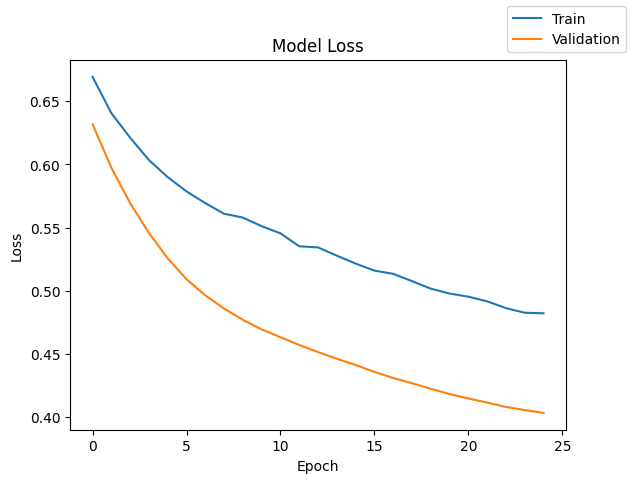

In [ ]:
# Plot for Train and Validation datasets
plot(history,'loss')

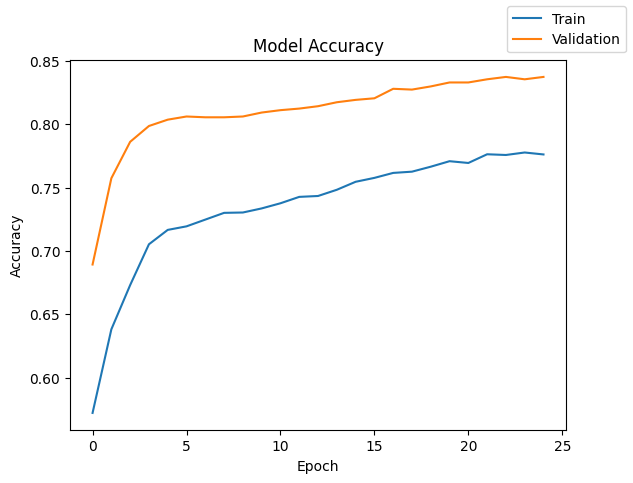

In [ ]:
# Plot for Train and Validation datasets
plot(history,'accuracy')

In [ ]:
# Run Model on Test dataset
start = time.time()
history = model_adam_over_dp.fit(X_train_over, y_train_over, validation_data=(X_test,y_test) , batch_size=batch_size, epochs=epochs)
end=time.time()

Epoch 1/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7690 - loss: 0.4840 - val_accuracy: 0.2035 - val_loss: 10500.4902
Epoch 2/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7705 - loss: 0.4901 - val_accuracy: 0.2035 - val_loss: 10084.2148
Epoch 3/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7781 - loss: 0.4790 - val_accuracy: 0.2035 - val_loss: 9772.3740
Epoch 4/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7799 - loss: 0.4790 - val_accuracy: 0.2035 - val_loss: 9306.6777
Epoch 5/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7897 - loss: 0.4739 - val_accuracy: 0.2035 - val_loss: 8990.6514
Epoch 6/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7794 - loss: 0.4801 - val_accuracy: 0.2035 - val_loss: 8472.4883
Epoch 7/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7768 - loss: 0.4804 - val_accuracy: 0.2035 - val_loss: 7957.0527
Epoch 8/25
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7810 - loss: 0

In [ ]:
print("Time taken in seconds ",end-start)

Time taken in seconds  16.63998007774353


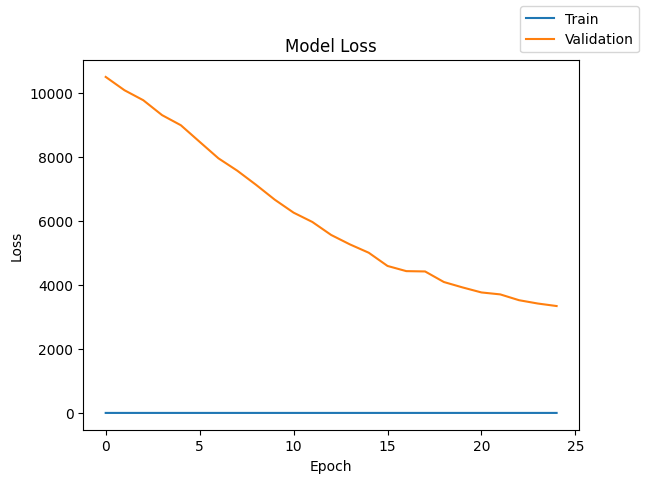

In [ ]:
# Plot for Test dataset
plot(history,'loss')

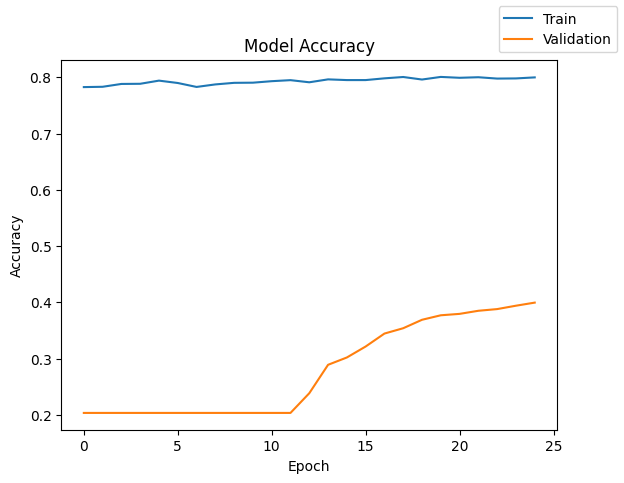

In [ ]:
# Plot for Test datasets
plot(history,'accuracy')

#### Performance Measurements for Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout  

In [ ]:
# Performance numbers on Train Dataset with Adam Optimizer, Drop and Balanced data
model_adam_over_dp_train_perf = model_performance_classification(model_adam_over_dp, X_train, y_train)
model_adam_over_dp_train_perf

200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Accuracy    Recall  Precision  F1 Score
0  0.848906  0.848906   0.837713  0.839481

In [ ]:
# Performance numbers on Validation Dataset with Adam Optimizer, Drop and Balanced data
model_adam_over_dp_valid_perf = model_performance_classification(model_adam_over_dp, X_valid, y_valid)
model_adam_over_dp_valid_perf

50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


Accuracy  Recall  Precision  F1 Score
0    0.8375  0.8375   0.824267  0.826983

In [ ]:
# Performance numbers on Test Dataset with Adam Optimizer, Drop and Balanced data
model_adam_over_dp_test_perf = model_performance_classification(model_adam_over_dp, X_test, y_test)
model_adam_over_dp_test_perf

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


Accuracy  Recall  Precision  F1 Score
0    0.3995  0.3995   0.629022  0.447874

## Model Performance Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model_sgd_train_perf.T,
        model_sgd_tuned_train_perf.T,
        model_adam_train_perf.T,
        model_adam_lr_train_perf.T,
        model_adam_lr_tuned_train_perf.T,
        model_adam_lr_dp_train_perf.T,
        model_sgd_tuned_over_train_perf.T,
        model_adam_over_train_perf.T,
        model_adam_over_dp_train_perf.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Neural Network (SGD)",
    "Neural Network (SGD),Tuned 1 Layer 192 Neurons",
    "Neural Network (Adam)",
    "Neural Network (Adam),Learning 1e-4)",
    "Neural Network (Adam),Tuned 2 Layer 64/224 Neurons",
    "Neural Network (Adam), dropout [0.2])",
    "Neural Network (SGD),Balanced [0.4]",
    "Neural Network (Adam),Balanced [0.4]",
    "Neural Network (Adam), dropout [0.2], Balanced [0.4]"
]

In [ ]:
#Validation performance comparison

models_valid_comp_df = pd.concat(
    [
        model_sgd_valid_perf.T,
        model_sgd_tuned_valid_perf.T,
        model_adam_valid_perf.T,
        model_adam_lr_valid_perf.T,
        model_adam_lr_tuned_valid_perf.T,
        model_adam_lr_dp_valid_perf.T,
        model_sgd_tuned_over_val_perf.T,
        model_adam_over_valid_perf.T,
        model_adam_over_dp_valid_perf.T,
    ],
    axis=1,
)
models_valid_comp_df.columns = [
    "Neural Network (SGD)",
    "Neural Network (SGD) Tuned 1 Layer 192 Neurons",
    "Neural Network (Adam)",
    "Neural Network (Adam), Learning 1e-4)",
    "Neural Network (Adam),Tuned 2 Layer 64/224 Neurons",
    "Neural Network (Adam), dropout [0.2])",
    "Neural Network (SGD),Balanced [0.4]",
    "Neural Network (Adam),Balanced [0.4]",
    "Neural Network (Adam), dropout [0.2], Balanced [0.4]"
]

In [ ]:
#Test performance comparison

models_test_comp_df = pd.concat(
    [
        model_sgd_test_perf.T,
        model_sgd_tuned_test_perf.T,
        model_adam_test_perf.T,
        model_adam_lr_test_perf.T,
        model_adam_lr_tuned_test_perf.T,
        model_adam_lr_dp_test_perf.T,
        model_sgd_tuned_over_test_perf.T,
        model_adam_over_test_perf.T,
        model_adam_over_dp_test_perf.T
    ],
    axis=1,
)
models_test_comp_df.columns =  [
    "Neural Network (SGD)",
    "Neural Network (SGD) Tuned 1 Layer 192 Neurons",
    "Neural Network (Adam)",
    "Neural Network (Adam, Learning 1e-4)",
    "Neural Network (Adam),Tuned 2 Layer 64/224 Neurons",
    "Neural Network (Adam), dropout [0.2])",
    "Neural Network (SGD),Balanced [0.4]",
    "Neural Network (Adam),Balanced [0.4]",
    "Neural Network (Adam), dropout [0.2], Balanced [0.4]"
]


In [ ]:
models_train_comp_df

Neural Network (SGD)  \
Accuracy               0.849531   
Recall                 0.849531   
Precision              0.837308   
F1 Score               0.834409   

           Neural Network (SGD),Tuned 1 Layer 192 Neurons  \
Accuracy                                         0.852344   
Recall                                           0.852344   
Precision                                        0.841451   
F1 Score                                         0.835725   

           Neural Network (Adam)  Neural Network (Adam),Learning 1e-4)  \
Accuracy                0.869844                              0.846094   
Recall                  0.869844                              0.846094   
Precision               0.862990                              0.837596   
F1 Score                0.857419                              0.821274   

           Neural Network (Adam),Tuned 2 Layer 64/224 Neurons  \
Accuracy                                            0.932344    
Recall                                              0.932344    
Precision                                           0.931433    
F1 Score                                            0.929580    

           Neural Network (Adam), dropout [0.2])  \
Accuracy                                0.868125   
Recall                                  0.868125   
Precision                               0.861029   
F1 Score                                0.855172   

           Neural Network (SGD),Balanced [0.4]  \
Accuracy                              0.655312   
Recall                                0.655312   
Precision                             0.682272   
F1 Score                              0.667724   

           Neural Network (Adam),Balanced [0.4]  \
Accuracy                               0.846094   
Recall                                 0.846094   
Precision                              0.838963   
F1 Score                               0.841590   

           Neural Network (Adam), dropout [0.2], Balanced [0.4]  
Accuracy                                            0.848906     
Recall                                              0.848906     
Precision                                           0.837713     
F1 Score                                            0.839481

In [ ]:
models_valid_comp_df

Neural Network (SGD)  \
Accuracy               0.837500   
Recall                 0.837500   
Precision              0.821699   
F1 Score               0.820202   

           Neural Network (SGD) Tuned 1 Layer 192 Neurons  \
Accuracy                                         0.843750   
Recall                                           0.843750   
Precision                                        0.830388   
F1 Score                                         0.824398   

           Neural Network (Adam)  Neural Network (Adam), Learning 1e-4)  \
Accuracy                0.842500                               0.836875   
Recall                  0.842500                               0.836875   
Precision               0.828291                               0.823109   
F1 Score                0.827030                               0.810515   

           Neural Network (Adam),Tuned 2 Layer 64/224 Neurons  \
Accuracy                                            0.821875    
Recall                                              0.821875    
Precision                                           0.807063    
F1 Score                                            0.811399    

           Neural Network (Adam), dropout [0.2])  \
Accuracy                                0.846250   
Recall                                  0.846250   
Precision                               0.833328   
F1 Score                                0.828904   

           Neural Network (SGD),Balanced [0.4]  \
Accuracy                              0.661875   
Recall                                0.661875   
Precision                             0.680516   
F1 Score                              0.670687   

           Neural Network (Adam),Balanced [0.4]  \
Accuracy                               0.843125   
Recall                                 0.843125   
Precision                              0.833913   
F1 Score                               0.836863   

           Neural Network (Adam), dropout [0.2], Balanced [0.4]  
Accuracy                                            0.837500     
Recall                                              0.837500     
Precision                                           0.824267     
F1 Score                                            0.826983

In [ ]:
models_test_comp_df

Neural Network (SGD)  \
Accuracy               0.203500   
Recall                 0.203500   
Precision              0.041412   
F1 Score               0.068820   

           Neural Network (SGD) Tuned 1 Layer 192 Neurons  \
Accuracy                                         0.534000   
Recall                                           0.534000   
Precision                                        0.625388   
F1 Score                                         0.571873   

           Neural Network (Adam)  Neural Network (Adam, Learning 1e-4)  \
Accuracy                0.203500                              0.485500   
Recall                  0.203500                              0.485500   
Precision               0.041412                              0.641867   
F1 Score                0.068820                              0.535607   

           Neural Network (Adam),Tuned 2 Layer 64/224 Neurons  \
Accuracy                                            0.203500    
Recall                                              0.203500    
Precision                                           0.041412    
F1 Score                                            0.068820    

           Neural Network (Adam), dropout [0.2])  \
Accuracy                                0.203500   
Recall                                  0.203500   
Precision                               0.041412   
F1 Score                                0.068820   

           Neural Network (SGD),Balanced [0.4]  \
Accuracy                              0.203500   
Recall                                0.203500   
Precision                             0.041412   
F1 Score                              0.068820   

           Neural Network (Adam),Balanced [0.4]  \
Accuracy                               0.509000   
Recall                                 0.509000   
Precision                              0.731248   
F1 Score                               0.552009   

           Neural Network (Adam), dropout [0.2], Balanced [0.4]  
Accuracy                                            0.399500     
Recall                                              0.399500     
Precision                                           0.629022     
F1 Score                                            0.447874

## Actionable Insights and Business Recommendations

* The Best Model with the highest Recall was the Neural Network (SGD) Tuned 1 Layer 192 Neurons. The Recall Score resulted in 53.40%.

* Need to increase the metric scores as this recall is to low. This requires experimenting with different Learning rates, Epochs , Batches combinations.

* Gather more data. The number of rows for the dataset is too small for running a Neural Network.

* Increase the attributes set as well.

* Run Tree based models for this size of a dataset.

* Offer promotional incentives to those customers expecting to leave the bank within the following six months.

